In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time
import os
import sys
sys.path.append('../../')

from data.processing import get_data

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from main.seir.sensitivity import calculate_sensitivity_and_plot
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
#from utils.generic.logging import log_wandb
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml

In [3]:
from os.path import exists, join, splitext

In [4]:
config_filename = 'uncer.yaml'
config1 = read_config(config_filename)
config2 = read_config('default.yaml')

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0            | 241935.0            | 243169.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 8/1500 [00:00<00:18, 79.43it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.013318559695765,
    'I_hosp_ratio': 1.0046182748545047,
    'P_fatal': 1.0211717257878115,
    'T_inc': 1.0051776435994182,
    'T_inf': 1.0186649151981402,
    'T_recov': 1.0232926245103018,
    'T_recov_fatal': 1.0404067124444227,
    'lockdown_R0': 1.0216477129448347,
    'sigma': 1.6758270540306284}


100%|██████████| 1500/1500 [00:14<00:00, 107.07it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7688156701358585), ('T_inc', 4.2439983924089395), ('T_inf', 4.421016220202125), ('T_recov', 11.0336647825254), ('T_recov_fatal', 17.40354766458133), ('P_fatal', 0.02590409722780114), ('E_hosp_ratio', 0.25128913989429774), ('I_hosp_ratio', 0.5185176129875382), ('sigma', 1.5424535458133628)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:48<00:00, 30.82trial/s, best loss: 0.6152349245966163]
best parameters
 {'E_hosp_ratio': 0.40683687886039005, 'I_hosp_ratio': 0.34564987299910044, 'P_fatal': 0.019108698724944775, 'T_inc': 4.8844413828117155, 'T_inf': 3.6307295433258746, 'T_recov': 11.192490464125527, 'T_recov_fatal': 11.186226646751933, 'lockdown_R0': 0.8027768071111648}


14it [00:00, 138.99it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 141.73it/s]
15it [00:00, 145.45it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 139.70it/s]
17it [00:00, 163.22it/s]

getting forecasts ..


1500it [00:09, 152.63it/s]
100%|██████████| 101/101 [01:44<00:00,  1.04s/it]


Best beta - 10.0
Min Loss - 1.5774559172650728
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 96.58it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0363846230979163,
    'I_hosp_ratio': 1.0382719963810751,
    'P_fatal': 1.0145612153942405,
    'T_inc': 1.0041807901015138,
    'T_inf': 1.017304286000856,
    'T_recov': 1.0083858992315682,
    'T_recov_fatal': 1.0304003500790926,
    'lockdown_R0': 1.012140478863644,
    'sigma': 1.876495202036532}


100%|██████████| 1500/1500 [00:13<00:00, 109.14it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7577521510425984), ('T_inc', 3.7308370268514577), ('T_inf', 3.997527460436057), ('T_recov', 11.34240205758029), ('T_recov_fatal', 21.55689871190723), ('P_fatal', 0.024736198419017252), ('E_hosp_ratio', 0.3309631767535635), ('I_hosp_ratio', 0.37128102623583614), ('sigma', 1.341360500367107)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.15trial/s, best loss: 0.7513763213428248]
best parameters
 {'E_hosp_ratio': 0.5315434442486653, 'I_hosp_ratio': 0.23895276064327103, 'P_fatal': 0.043633999428779414, 'T_inc': 4.066462309525196, 'T_inf': 3.8385217134823435, 'T_recov': 10.955188059679426, 'T_recov_fatal': 34.81689590972484, 'lockdown_R0': 0.7284209334937121}


15it [00:00, 146.03it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 143.08it/s]
14it [00:00, 136.13it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 131.73it/s]
30it [00:00, 143.54it/s]

getting forecasts ..


1500it [00:10, 142.79it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 10.0
Min Loss - 1.9286127331457255
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|▏         | 21/1500 [00:00<00:14, 101.29it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0269103125598738,
    'I_hosp_ratio': 1.0371600184228438,
    'P_fatal': 1.0315764007235309,
    'T_inc': 1.0065036549332336,
    'T_inf': 1.0932187891281466,
    'T_recov': 1.0052246718895086,
    'T_recov_fatal': 1.0048842030777845,
    'lockdown_R0': 1.0131310315453737,
    'sigma': 1.8621265657823287}


100%|██████████| 1500/1500 [00:14<00:00, 106.99it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.703850058897844), ('T_inc', 4.3322130561446865), ('T_inf', 3.8486033021290647), ('T_recov', 11.352131725839584), ('T_recov_fatal', 22.81050047571106), ('P_fatal', 0.031572795876683504), ('E_hosp_ratio', 0.3348084248525738), ('I_hosp_ratio', 0.404773567196559), ('sigma', 1.6806289863504444)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.07trial/s, best loss: 0.9605151415422133]
best parameters
 {'E_hosp_ratio': 0.17016828715059665, 'I_hosp_ratio': 0.37061758157112035, 'P_fatal': 0.04831224483871968, 'T_inc': 4.34900958783539, 'T_inf': 3.2508285258139034, 'T_recov': 11.923546794264375, 'T_recov_fatal': 39.26653511332473, 'lockdown_R0': 0.8695149580345174}


15it [00:00, 149.37it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 142.38it/s]
15it [00:00, 144.19it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 139.37it/s]
15it [00:00, 143.85it/s]

getting forecasts ..


1500it [00:10, 146.29it/s]
100%|██████████| 101/101 [01:43<00:00,  1.03s/it]


Best beta - 3.4000000000000004
Min Loss - 3.4895601423761398
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43       

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:16, 90.58it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0334041997039407,
    'I_hosp_ratio': 1.0312286140799942,
    'P_fatal': 1.0071755797672826,
    'T_inc': 1.0062878025937978,
    'T_inf': 1.031939636489364,
    'T_recov': 1.0041604803209303,
    'T_recov_fatal': 1.0217716281496296,
    'lockdown_R0': 1.0231556924759184,
    'sigma': 1.9185769824678875}


  6%|▌         | 89/1500 [00:00<00:13, 106.40it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
100%|██████████| 1500/1500 [00:14<00:00, 103.75it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7943064564901153), ('T_inc', 4.359739690696596), ('T_inf', 4.42602378904424), ('T_recov', 11.002685969096222), ('T_recov_fatal', 27.162943112529394), ('P_fatal', 0.037766792891031936), ('E_hosp_ratio', 0.363500984321417), ('I_hosp_ratio', 0.4158019865650245), ('sigma', 1.5464180922234623)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.19trial/s, best loss: 0.5647332833084937]
best parameters
 {'E_hosp_ratio': 0.3910314209613892, 'I_hosp_ratio': 0.30471461774068587, 'P_fatal': 0.037325654674809965, 'T_inc': 4.868710853240985, 'T_inf': 3.2113991996114155, 'T_recov': 11.33909821893689, 'T_recov_fatal': 28.685065462340482, 'lockdown_R0': 0.792168745588425}


15it [00:00, 141.75it/s]

getting forecasts ..
getting forecasts ..


319it [00:02, 145.22it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:11, 131.15it/s]
16it [00:00, 156.61it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 144.85it/s]
13it [00:00, 123.62it/s]

getting forecasts ..


1500it [00:09, 155.55it/s]
100%|██████████| 101/101 [01:42<00:00,  1.02s/it]


Best beta - 8.1
Min Loss - 2.066573792939955
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 100.34it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0152903888033433,
    'I_hosp_ratio': 1.0214413869264498,
    'P_fatal': 1.0166976146453126,
    'T_inc': 1.006649740504157,
    'T_inf': 1.040227082594693,
    'T_recov': 1.0097531948869478,
    'T_recov_fatal': 1.0230753859038644,
    'lockdown_R0': 1.023207475166246,
    'sigma': 1.6900777294840892}


100%|██████████| 1500/1500 [00:13<00:00, 109.11it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.8161267600837983), ('T_inc', 4.548314727070307), ('T_inf', 4.217264793470119), ('T_recov', 11.38682406400199), ('T_recov_fatal', 28.21988398995508), ('P_fatal', 0.03497714660453794), ('E_hosp_ratio', 0.25112372467014177), ('I_hosp_ratio', 0.4563631739515122), ('sigma', 2.7628342740093954)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:48<00:00, 30.77trial/s, best loss: 0.679057229565889] 
best parameters
 {'E_hosp_ratio': 0.31089199697691794, 'I_hosp_ratio': 0.3783368542748312, 'P_fatal': 0.04347213062291604, 'T_inc': 4.462389914961582, 'T_inf': 3.809538544614112, 'T_recov': 11.334955652819202, 'T_recov_fatal': 33.65815308110547, 'lockdown_R0': 0.8256726141050945}


16it [00:00, 155.57it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 146.45it/s]
15it [00:00, 142.74it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 140.70it/s]
17it [00:00, 160.43it/s]

getting forecasts ..


1500it [00:10, 149.38it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 9.8
Min Loss - 2.5824231338825485
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 100.28it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0075077949171607,
    'I_hosp_ratio': 1.0119822804744827,
    'P_fatal': 1.0201007270197218,
    'T_inc': 1.0041214367208622,
    'T_inf': 1.0374292086505659,
    'T_recov': 1.0176495579484288,
    'T_recov_fatal': 1.0227162688029143,
    'lockdown_R0': 1.011925132166314,
    'sigma': 1.638603788494836}


100%|██████████| 1500/1500 [00:13<00:00, 110.46it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7459924602465157), ('T_inc', 3.7997601512910895), ('T_inf', 4.358041735720538), ('T_recov', 11.162092512632155), ('T_recov_fatal', 16.78426390368601), ('P_fatal', 0.02604250961252759), ('E_hosp_ratio', 0.3806791037462829), ('I_hosp_ratio', 0.37413024606122486), ('sigma', 2.740554493377995)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.59trial/s, best loss: 0.5856499338852382]
best parameters
 {'E_hosp_ratio': 0.46922737687272537, 'I_hosp_ratio': 0.3043037258657476, 'P_fatal': 0.04368055994438858, 'T_inc': 4.667851986566214, 'T_inf': 3.6294658946272262, 'T_recov': 10.967763231501658, 'T_recov_fatal': 35.20794116071456, 'lockdown_R0': 0.7343904187374662}


15it [00:00, 148.15it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 132.51it/s]
15it [00:00, 144.94it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 131.29it/s]
14it [00:00, 130.59it/s]

getting forecasts ..


1500it [00:11, 130.98it/s]
100%|██████████| 101/101 [01:44<00:00,  1.04s/it]


Best beta - 9.8
Min Loss - 1.56480210563199
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0   

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 96.75it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0203661402588389,
    'I_hosp_ratio': 1.014441621466561,
    'P_fatal': 1.0251767582191535,
    'T_inc': 1.0040089011383408,
    'T_inf': 1.034902283916963,
    'T_recov': 1.0095949805534241,
    'T_recov_fatal': 1.0146541440529333,
    'lockdown_R0': 1.0200448319844473,
    'sigma': 2.7169664720085107}


100%|██████████| 1500/1500 [00:13<00:00, 107.34it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7614516427134267), ('T_inc', 4.175670099689862), ('T_inf', 3.9681649190925197), ('T_recov', 11.829119701996557), ('T_recov_fatal', 16.63316637024376), ('P_fatal', 0.02538269722424373), ('E_hosp_ratio', 0.30066779284631284), ('I_hosp_ratio', 0.3904670260855812), ('sigma', 1.4345016987367605)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.01trial/s, best loss: 0.7691808866730525]
best parameters
 {'E_hosp_ratio': 0.37452038260676723, 'I_hosp_ratio': 0.3468880781850382, 'P_fatal': 0.047103074704063656, 'T_inc': 4.7214411094514945, 'T_inf': 3.2047674330192306, 'T_recov': 10.905547686238723, 'T_recov_fatal': 33.83393212564878, 'lockdown_R0': 0.727842996824093}


16it [00:00, 156.14it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 139.12it/s]
15it [00:00, 142.79it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 141.13it/s]
31it [00:00, 149.95it/s]

getting forecasts ..


1500it [00:10, 145.15it/s]
100%|██████████| 101/101 [01:43<00:00,  1.03s/it]


Best beta - 6.1000000000000005
Min Loss - 1.7221142450768188
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43       

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 96.76it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0282515837999218,
    'I_hosp_ratio': 1.0335572872066547,
    'P_fatal': 1.0305763832425505,
    'T_inc': 1.005413734905418,
    'T_inf': 1.0688482571209788,
    'T_recov': 1.02839094730587,
    'T_recov_fatal': 1.0409621674316054,
    'lockdown_R0': 1.008692929822159,
    'sigma': 1.720567778055337}


100%|██████████| 1500/1500 [00:13<00:00, 107.76it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7558793435172105), ('T_inc', 3.6884151685117224), ('T_inf', 4.641917645875264), ('T_recov', 11.826919194087276), ('T_recov_fatal', 25.111466977998923), ('P_fatal', 0.03730760007796786), ('E_hosp_ratio', 0.30118450742999736), ('I_hosp_ratio', 0.4183658554092643), ('sigma', 1.216109441735717)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 79%|███████▉  | 1182/1500 [00:37<00:12, 25.63trial/s, best loss: 0.9348364182734721]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1500/1500 [00:51<00:00, 29.09trial/s, best loss: 0.8121832002129903]
best parameters
 {'E_hosp_ratio': 0.2581341059720994, 'I_hosp_ratio': 0.3956954387246886, 'P_fatal': 0.01634136337463562, 'T_inc': 4.069677676047748, 'T_inf': 3.648026984073546, 'T_recov': 11.102330881416139, 'T_recov_fatal': 10.5491571860379, 'lockdown_R0': 0.8628194315279537}


15it [00:00, 147.75it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 144.76it/s]
15it [00:00, 146.90it/s]

getting forecasts ..
getting forecasts ..


257it [00:01, 145.07it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:12, 116.62it/s]
16it [00:00, 155.75it/s]

getting forecasts ..


254it [00:01, 153.73it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:11, 130.25it/s]
100%|██████████| 101/101 [01:43<00:00,  1.03s/it]


Best beta - 10.0
Min Loss - 3.099704861290414
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 97.14it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.019169282192698,
    'I_hosp_ratio': 1.018299847390872,
    'P_fatal': 1.0225596970138557,
    'T_inc': 1.0037003490825211,
    'T_inf': 1.0605175247312684,
    'T_recov': 1.0050520054258638,
    'T_recov_fatal': 1.0194240951888833,
    'lockdown_R0': 1.013185786956199,
    'sigma': 1.6546644498443623}


100%|██████████| 1500/1500 [00:13<00:00, 107.71it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.760699976894187), ('T_inc', 4.38860396119787), ('T_inf', 3.5877779051677843), ('T_recov', 11.249827861162725), ('T_recov_fatal', 24.033378544702284), ('P_fatal', 0.03392814849297576), ('E_hosp_ratio', 0.3878628538390537), ('I_hosp_ratio', 0.33736388302339265), ('sigma', 1.3262943064591828)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 35%|███▌      | 527/1500 [00:13<00:58, 16.76trial/s, best loss: 1.0526647823487216]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1500/1500 [00:50<00:00, 29.69trial/s, best loss: 0.7271902857162441]
best parameters
 {'E_hosp_ratio': 0.24042735210233465, 'I_hosp_ratio': 0.3525367317610017, 'P_fatal': 0.022933594453818384, 'T_inc': 4.116882452989008, 'T_inf': 3.257125220935473, 'T_recov': 11.791509472397722, 'T_recov_fatal': 12.568127457713299, 'lockdown_R0': 0.8481887642746684}


15it [00:00, 145.42it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 144.35it/s]
15it [00:00, 141.43it/s]

getting forecasts ..
getting forecasts ..


242it [00:01, 144.85it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:13, 114.61it/s]
15it [00:00, 149.90it/s]

getting forecasts ..


228it [00:01, 160.66it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:11, 128.35it/s]
100%|██████████| 101/101 [01:44<00:00,  1.04s/it]


Best beta - 10.0
Min Loss - 2.37208044391268
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 100.27it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0384599817883218,
    'I_hosp_ratio': 1.0355793903448145,
    'P_fatal': 1.013319298594939,
    'T_inc': 1.0050273723560932,
    'T_inf': 1.0269107427473438,
    'T_recov': 1.012177022881395,
    'T_recov_fatal': 1.0165423457923906,
    'lockdown_R0': 1.031260442160663,
    'sigma': 2.0684038588431446}


100%|██████████| 1500/1500 [00:13<00:00, 109.28it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.8021646897103832), ('T_inc', 4.1564616307932765), ('T_inf', 4.921170685321881), ('T_recov', 11.298371005145707), ('T_recov_fatal', 23.99656389228373), ('P_fatal', 0.032098351090306086), ('E_hosp_ratio', 0.2405403618477316), ('I_hosp_ratio', 0.5160445436161312), ('sigma', 1.1993380407481902)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.51trial/s, best loss: 0.9599933205143465]
best parameters
 {'E_hosp_ratio': 0.1564855637647243, 'I_hosp_ratio': 0.3663778905087305, 'P_fatal': 0.04158622112998507, 'T_inc': 4.333319970821548, 'T_inf': 3.0783413235644135, 'T_recov': 11.698400506841422, 'T_recov_fatal': 31.33794237113836, 'lockdown_R0': 0.9679092943146521}


16it [00:00, 150.17it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 147.22it/s]
15it [00:00, 147.02it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 130.47it/s]
33it [00:00, 157.52it/s]

getting forecasts ..


1500it [00:10, 149.16it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 2.1
Min Loss - 4.375389317748553
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:16, 92.17it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0267981669126722,
    'I_hosp_ratio': 1.0172690838998315,
    'P_fatal': 1.0055188197748413,
    'T_inc': 1.0034752813432386,
    'T_inf': 1.0276101294513755,
    'T_recov': 1.0148963893925647,
    'T_recov_fatal': 1.0254691042589201,
    'lockdown_R0': 1.0227199088386973,
    'sigma': 2.225048647728672}


100%|██████████| 1500/1500 [00:13<00:00, 109.03it/s]
../../viz/fit.py:81: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(nrows=n_rows, figsize=(12, 10*n_rows))


best parameters
 OrderedDict([('lockdown_R0', 0.8213190392595621), ('T_inc', 4.887749984243955), ('T_inf', 3.8992253652877302), ('T_recov', 11.558336218808341), ('T_recov_fatal', 16.915688435232905), ('P_fatal', 0.022935763980568895), ('E_hosp_ratio', 0.2913545526956597), ('I_hosp_ratio', 0.415438595676355), ('sigma', 2.7153229654333186)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharasht

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.57trial/s, best loss: 0.7701716134798064]
best parameters
 {'E_hosp_ratio': 0.3992462814951104, 'I_hosp_ratio': 0.37260712298942167, 'P_fatal': 0.03271385998196494, 'T_inc': 4.517493566466176, 'T_inf': 3.8787880618816164, 'T_recov': 11.161497669736294, 'T_recov_fatal': 22.313363127117732, 'lockdown_R0': 0.7707232301186319}


10it [00:00, 94.49it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 143.27it/s]
15it [00:00, 148.43it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 139.66it/s]
33it [00:00, 161.14it/s]

getting forecasts ..


1500it [00:09, 151.40it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 10.0
Min Loss - 1.56417281265017
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 101.80it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0105954777229587,
    'I_hosp_ratio': 1.0122764007218779,
    'P_fatal': 1.0146666425064907,
    'T_inc': 1.0043735741416078,
    'T_inf': 1.0968792599336779,
    'T_recov': 1.010916705867217,
    'T_recov_fatal': 1.0108629733033028,
    'lockdown_R0': 1.0078111101655485,
    'sigma': 1.5121027665523195}


100%|██████████| 1500/1500 [00:13<00:00, 108.32it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7918129800635031), ('T_inc', 3.6633270518867898), ('T_inf', 3.555288986773061), ('T_recov', 11.491711159043513), ('T_recov_fatal', 15.880431963599882), ('P_fatal', 0.025403203379253808), ('E_hosp_ratio', 0.2887098631790464), ('I_hosp_ratio', 0.36323980147950463), ('sigma', 1.5784271643186645)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharas

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.17trial/s, best loss: 0.698723241584134] 
best parameters
 {'E_hosp_ratio': 0.32165822906529373, 'I_hosp_ratio': 0.4042537276132606, 'P_fatal': 0.04040623783056721, 'T_inc': 4.905335506190636, 'T_inf': 3.696878048138481, 'T_recov': 11.02367781185118, 'T_recov_fatal': 34.45399669306743, 'lockdown_R0': 0.8235755994588567}


15it [00:00, 142.42it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 145.46it/s]
16it [00:00, 152.21it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 140.68it/s]
16it [00:00, 159.01it/s]

getting forecasts ..


1500it [00:10, 141.95it/s]
100%|██████████| 101/101 [01:43<00:00,  1.03s/it]


Best beta - 4.2
Min Loss - 2.5616487012156637
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:13, 108.43it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.028248003331607,
    'I_hosp_ratio': 1.028703035850971,
    'P_fatal': 1.0095883254947082,
    'T_inc': 1.0021015303798506,
    'T_inf': 1.031524165424568,
    'T_recov': 1.005559160057049,
    'T_recov_fatal': 1.0189342590196393,
    'lockdown_R0': 1.018247998825425,
    'sigma': 2.2029681137719535}


100%|██████████| 1500/1500 [00:13<00:00, 107.67it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.78539374890675), ('T_inc', 3.571491728385213), ('T_inf', 4.193935039025444), ('T_recov', 11.274820958133223), ('T_recov_fatal', 29.039907075217386), ('P_fatal', 0.03567160296551249), ('E_hosp_ratio', 0.24717849184756968), ('I_hosp_ratio', 0.43004109996710493), ('sigma', 1.79326051724873)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 51%|█████▏    | 769/1500 [00:20<00:23, 31.13trial/s, best loss: 1.184382700578165] 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1500/1500 [00:49<00:00, 30.29trial/s, best loss: 0.6697840293318023]
best parameters
 {'E_hosp_ratio': 0.36871871604139755, 'I_hosp_ratio': 0.2906773140168232, 'P_fatal': 0.03838880160641518, 'T_inc': 4.124575017006203, 'T_inf': 3.112673806118074, 'T_recov': 11.127675108899744, 'T_recov_fatal': 26.78586538667424, 'lockdown_R0': 0.7586631383719763}


15it [00:00, 144.40it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 133.33it/s]
16it [00:00, 153.68it/s]

getting forecasts ..
getting forecasts ..


1196it [00:08, 142.83it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:11, 131.03it/s]
17it [00:00, 163.95it/s]

getting forecasts ..


1207it [00:08, 149.64it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:10, 137.63it/s]
100%|██████████| 101/101 [01:42<00:00,  1.02s/it]


Best beta - 10.0
Min Loss - 1.9512758046743541
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 103.81it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0296703535451306,
    'I_hosp_ratio': 1.0255402018960613,
    'P_fatal': 1.0097398724295825,
    'T_inc': 1.0033541047222143,
    'T_inf': 1.0751441699510214,
    'T_recov': 1.0144632152875324,
    'T_recov_fatal': 1.0592669339987513,
    'lockdown_R0': 1.018101822605117,
    'sigma': 2.2612001946315026}


100%|██████████| 1500/1500 [00:13<00:00, 109.00it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.8428918311744346), ('T_inc', 4.687062765283501), ('T_inf', 3.4111441095748067), ('T_recov', 11.209286675467926), ('T_recov_fatal', 34.42989382859058), ('P_fatal', 0.04118389828472242), ('E_hosp_ratio', 0.30376146724601716), ('I_hosp_ratio', 0.35362108027807404), ('sigma', 1.8654094889603847)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharash

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 29%|██▊       | 429/1500 [00:10<00:48, 22.02trial/s, best loss: 1.1644686188264775]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 38%|███▊      | 569/1500 [00:14<00:43, 21.26trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 55%|█████▍    | 818/1500 [00:23<00:41, 16.49trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 55%|█████▍    | 822/1500 [00:23<00:35, 19.15trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 56%|█████▌    | 836/1500 [00:24<00:43, 15.22trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 63%|██████▎   | 939/1500 [00:29<00:20, 27.89trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 71%|███████   | 1062/1500 [00:34<00:16, 27.31trial/s, best loss: 0.8033285805410693]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1500/1500 [00:53<00:00, 28.12trial/s, best loss: 0.7643432103405577]
best parameters
 {'E_hosp_ratio': 0.3147034229152064, 'I_hosp_ratio': 0.3387257082855129, 'P_fatal': 0.01706490575923068, 'T_inc': 4.203048926301031, 'T_inf': 3.7519478731850873, 'T_recov': 11.874225337321722, 'T_recov_fatal': 8.886909472832322, 'lockdown_R0': 0.8613181007430027}


16it [00:00, 151.38it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 148.01it/s]
15it [00:00, 144.52it/s]

getting forecasts ..
getting forecasts ..


/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:18, 83.23it/s] 
16it [00:00, 158.86it/s]

getting forecasts ..


/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:18, 82.41it/s] 
100%|██████████| 101/101 [01:43<00:00,  1.03s/it]


Best beta - 6.4
Min Loss - 2.790421606295819
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:16, 92.39it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0176712486498676,
    'I_hosp_ratio': 1.0119287666141308,
    'P_fatal': 1.0051823407797449,
    'T_inc': 1.0079149444888729,
    'T_inf': 1.028962890715742,
    'T_recov': 1.0076515111509934,
    'T_recov_fatal': 1.0106824338935905,
    'lockdown_R0': 1.0151121803345147,
    'sigma': 2.1987528444521507}


100%|██████████| 1500/1500 [00:13<00:00, 108.49it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7421577964639012), ('T_inc', 3.697690221113738), ('T_inf', 4.116488714968037), ('T_recov', 11.110771087001625), ('T_recov_fatal', 33.20272807144727), ('P_fatal', 0.04402826888445734), ('E_hosp_ratio', 0.3579072917745797), ('I_hosp_ratio', 0.36557786097513617), ('sigma', 1.0565901527509478)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:48<00:00, 30.94trial/s, best loss: 0.9109132839091044]
best parameters
 {'E_hosp_ratio': 0.21827486329114293, 'I_hosp_ratio': 0.42843200407971666, 'P_fatal': 0.03964856877890048, 'T_inc': 4.317175772777671, 'T_inf': 3.355353695336762, 'T_recov': 11.0976405551536, 'T_recov_fatal': 34.072029047408186, 'lockdown_R0': 0.7863289344324679}


16it [00:00, 153.57it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 143.98it/s]
15it [00:00, 146.87it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 137.89it/s]
32it [00:00, 154.82it/s]

getting forecasts ..


1500it [00:10, 139.51it/s]
100%|██████████| 101/101 [01:43<00:00,  1.02s/it]


Best beta - 10.0
Min Loss - 2.5571060456788715
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 100.91it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0486688133864923,
    'I_hosp_ratio': 1.0179454104746986,
    'P_fatal': 1.0520445061688266,
    'T_inc': 1.0063911151817955,
    'T_inf': 1.079220129922191,
    'T_recov': 1.0046153725594567,
    'T_recov_fatal': 1.0131124062709969,
    'lockdown_R0': 1.0443805147898977,
    'sigma': 1.3863719793214917}


100%|██████████| 1500/1500 [00:14<00:00, 105.12it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7050479576683392), ('T_inc', 4.443096363432828), ('T_inf', 3.078454379585685), ('T_recov', 10.956670104486), ('T_recov_fatal', 13.852603220658196), ('P_fatal', 0.02089967112732235), ('E_hosp_ratio', 0.5570642804131254), ('I_hosp_ratio', 0.21435711731512014), ('sigma', 2.5006693080432187)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.59trial/s, best loss: 0.746210299901219] 
best parameters
 {'E_hosp_ratio': 0.2556448870772507, 'I_hosp_ratio': 0.35799732015823515, 'P_fatal': 0.04809429946177885, 'T_inc': 4.130683856713184, 'T_inf': 3.0008314902202873, 'T_recov': 11.025208750798418, 'T_recov_fatal': 39.163121513409735, 'lockdown_R0': 0.8290358280549145}


14it [00:00, 131.42it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 147.16it/s]
14it [00:00, 139.83it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 129.57it/s]
16it [00:00, 151.96it/s]

getting forecasts ..


1500it [00:09, 153.08it/s]
100%|██████████| 101/101 [01:43<00:00,  1.02s/it]


Best beta - 10.0
Min Loss - 2.8995107138044482
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|▏         | 22/1500 [00:00<00:14, 104.99it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0199240598314965,
    'I_hosp_ratio': 1.0266339299593754,
    'P_fatal': 1.0234304269285803,
    'T_inc': 1.0131718852922382,
    'T_inf': 1.0207737970409063,
    'T_recov': 1.0082795687997572,
    'T_recov_fatal': 1.0156797673993834,
    'lockdown_R0': 1.0086635880088888,
    'sigma': 1.3261585975443269}


100%|██████████| 1500/1500 [00:13<00:00, 108.37it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.8108930896207419), ('T_inc', 3.0115663081862225), ('T_inf', 4.454471137601235), ('T_recov', 10.694798968840553), ('T_recov_fatal', 38.52653487989679), ('P_fatal', 0.04908422763018784), ('E_hosp_ratio', 0.1406413282865248), ('I_hosp_ratio', 0.5149757308612177), ('sigma', 1.5669936890509981)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:48<00:00, 30.64trial/s, best loss: 0.6072443809028125]
best parameters
 {'E_hosp_ratio': 0.3793149866947574, 'I_hosp_ratio': 0.28835838893678606, 'P_fatal': 0.03398882222363925, 'T_inc': 4.576262035681583, 'T_inf': 3.174363370212815, 'T_recov': 11.952319634581938, 'T_recov_fatal': 23.88551496494401, 'lockdown_R0': 0.7550098681222427}


15it [00:00, 141.04it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 147.65it/s]
16it [00:00, 158.16it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 143.60it/s]
16it [00:00, 158.23it/s]

getting forecasts ..


1500it [00:10, 138.27it/s]
100%|██████████| 101/101 [01:43<00:00,  1.02s/it]


Best beta - 5.2
Min Loss - 1.9793475783155579
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|▏         | 21/1500 [00:00<00:15, 98.39it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0115005129412793,
    'I_hosp_ratio': 1.0178857254484917,
    'P_fatal': 1.0274691062735664,
    'T_inc': 1.0036926663241301,
    'T_inf': 1.037275814997007,
    'T_recov': 1.0106343904742945,
    'T_recov_fatal': 1.0210074834090432,
    'lockdown_R0': 1.0150339370021246,
    'sigma': 2.7043467717365637}


100%|██████████| 1500/1500 [00:13<00:00, 108.35it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7688317206718132), ('T_inc', 4.1224423652622075), ('T_inf', 3.3862127190931064), ('T_recov', 11.092122816128764), ('T_recov_fatal', 22.81613412492867), ('P_fatal', 0.033772629692496454), ('E_hosp_ratio', 0.37086824019078407), ('I_hosp_ratio', 0.32369368709328217), ('sigma', 2.8172473850691695)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Mahara

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


 33%|███▎      | 500/1500 [00:12<00:27, 35.94trial/s, best loss: 1.1919302689115372]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 43%|████▎     | 644/1500 [00:19<00:55, 15.52trial/s, best loss: 0.9950422306101498]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



 53%|█████▎    | 788/1500 [00:23<00:36, 19.36trial/s, best loss: 0.9650795051322035]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE



100%|██████████| 1500/1500 [00:50<00:00, 29.63trial/s, best loss: 0.8325449528047842]
best parameters
 {'E_hosp_ratio': 0.2776665468754914, 'I_hosp_ratio': 0.342891038617575, 'P_fatal': 0.016846467231999143, 'T_inc': 4.6115075641848575, 'T_inf': 3.122863515505127, 'T_recov': 11.133156208204024, 'T_recov_fatal': 9.437382765506145, 'lockdown_R0': 0.9051142797957292}


16it [00:00, 153.81it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 130.96it/s]
16it [00:00, 155.13it/s]

getting forecasts ..
getting forecasts ..


616it [00:04, 134.27it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:14, 106.64it/s]
16it [00:00, 152.99it/s]

getting forecasts ..


615it [00:03, 140.28it/s]/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:336: RuntimeWarning: overflow encountered in multiply
  new_factor = NUM_JAC_FACTOR_INCREASE * factor[ind]
/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:358: RuntimeWarning: overflow encountered in multiply
  factor[max_diff < NUM_JAC_DIFF_SMALL * scale] *= NUM_JAC_FACTOR_INCREASE
1500it [00:13, 114.10it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 10.0
Min Loss - 3.98294850803604
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0  

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 10/1500 [00:00<00:15, 96.91it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0183740230588243,
    'I_hosp_ratio': 1.0066482320840462,
    'P_fatal': 1.026823612165087,
    'T_inc': 1.0046867970036122,
    'T_inf': 1.060061475192187,
    'T_recov': 1.011384840433172,
    'T_recov_fatal': 1.0184105779965753,
    'lockdown_R0': 1.0208051559790265,
    'sigma': 1.3270126067063743}


100%|██████████| 1500/1500 [00:13<00:00, 109.21it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7639239933753336), ('T_inc', 4.735509955669437), ('T_inf', 4.229117732965525), ('T_recov', 11.494367877864313), ('T_recov_fatal', 21.458421865232175), ('P_fatal', 0.03557229276348012), ('E_hosp_ratio', 0.4108098426346871), ('I_hosp_ratio', 0.3671944394009143), ('sigma', 2.532076916249792)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.58trial/s, best loss: 0.5962732500035673]
best parameters
 {'E_hosp_ratio': 0.4069092570086761, 'I_hosp_ratio': 0.32151238883983696, 'P_fatal': 0.048947758421501834, 'T_inc': 4.276628173842948, 'T_inf': 3.6906675893103427, 'T_recov': 10.950703244072372, 'T_recov_fatal': 38.56647893947666, 'lockdown_R0': 0.7547230325129747}


16it [00:00, 152.59it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 131.56it/s]
16it [00:00, 158.48it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 145.89it/s]
16it [00:00, 152.08it/s]

getting forecasts ..


1500it [00:09, 150.31it/s]
100%|██████████| 101/101 [01:44<00:00,  1.03s/it]


Best beta - 10.0
Min Loss - 2.464119853235564
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 236513.43           | 238242.43           | 240335.0 

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  1%|          | 11/1500 [00:00<00:14, 100.55it/s]

Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0424582014516237,
    'I_hosp_ratio': 1.032461057318073,
    'P_fatal': 1.0139077005045667,
    'T_inc': 1.0032543291162677,
    'T_inf': 1.041713785787976,
    'T_recov': 1.0142903383029096,
    'T_recov_fatal': 1.031041984588318,
    'lockdown_R0': 1.0230083606823122,
    'sigma': 2.1819596892980906}


100%|██████████| 1500/1500 [00:13<00:00, 108.50it/s]


best parameters
 OrderedDict([('lockdown_R0', 0.7067068402478232), ('T_inc', 3.3166951738309205), ('T_inf', 4.160167925020694), ('T_recov', 10.93387535171175), ('T_recov_fatal', 35.9366692996366), ('P_fatal', 0.044186467964621355), ('E_hosp_ratio', 0.31716066492892414), ('I_hosp_ratio', 0.3903705430800519), ('sigma', 2.7428687151441986)])
Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_24112020_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 172                 | 173                 | 174                 | 175                 | 176                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-15 00:00:00 | 2020-10-16 00:00:00 | 2020-10-17 00:00:00 | 2020-10-18 00:00:00 | 2020-10-19 00:00:00 |
| state       | Maharashtr

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


100%|██████████| 1500/1500 [00:49<00:00, 30.06trial/s, best loss: 0.5415542124856401]
best parameters
 {'E_hosp_ratio': 0.37075431787588886, 'I_hosp_ratio': 0.3027177165415948, 'P_fatal': 0.033995330873536116, 'T_inc': 4.300982676781733, 'T_inf': 3.085203165512786, 'T_recov': 11.055501055392718, 'T_recov_fatal': 26.80194508374541, 'lockdown_R0': 0.793566138477246}


16it [00:00, 154.50it/s]

getting forecasts ..
getting forecasts ..


1500it [00:10, 146.87it/s]
15it [00:00, 148.37it/s]

getting forecasts ..
getting forecasts ..


1500it [00:11, 128.83it/s]
16it [00:00, 157.97it/s]

getting forecasts ..


1500it [00:09, 154.99it/s]
100%|██████████| 101/101 [01:43<00:00,  1.02s/it]


Best beta - 10.0
Min Loss - 1.6847222361965948


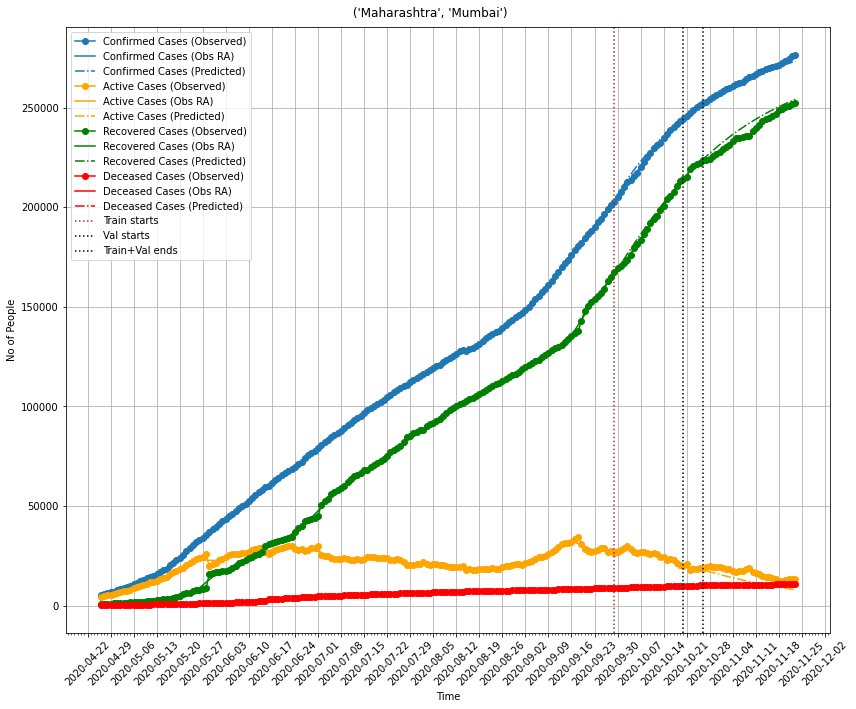

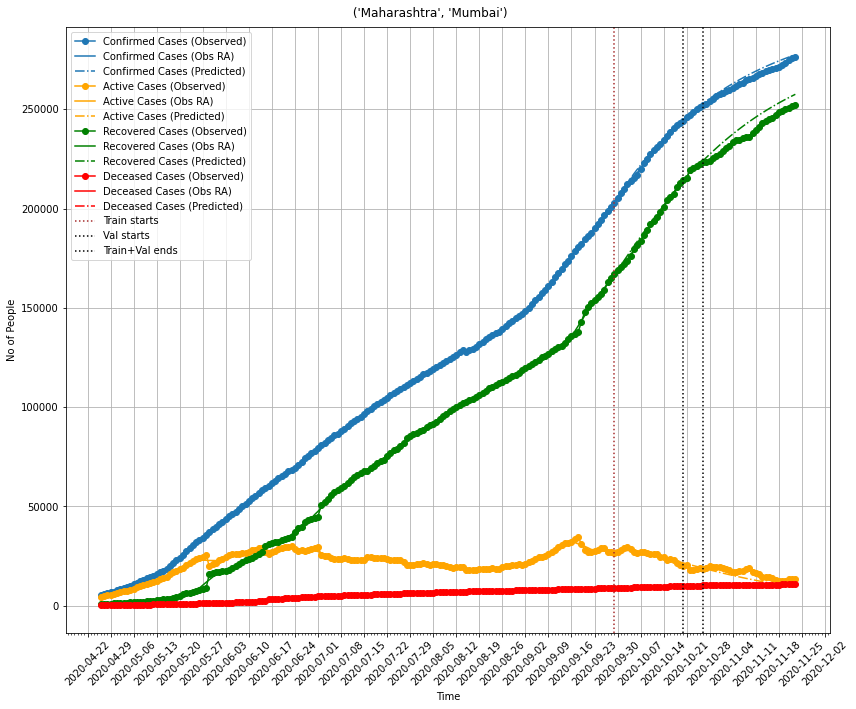

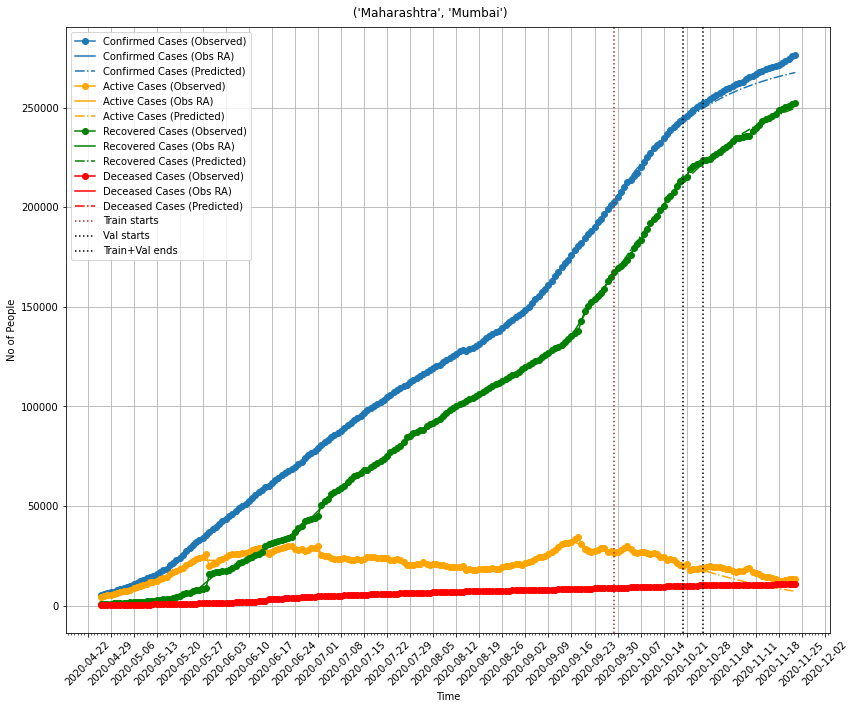

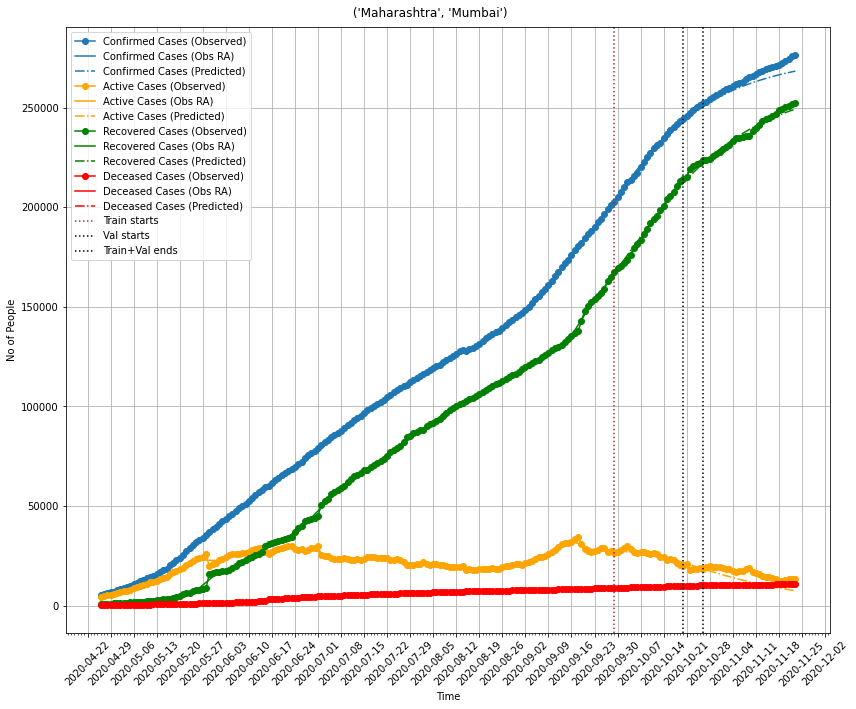

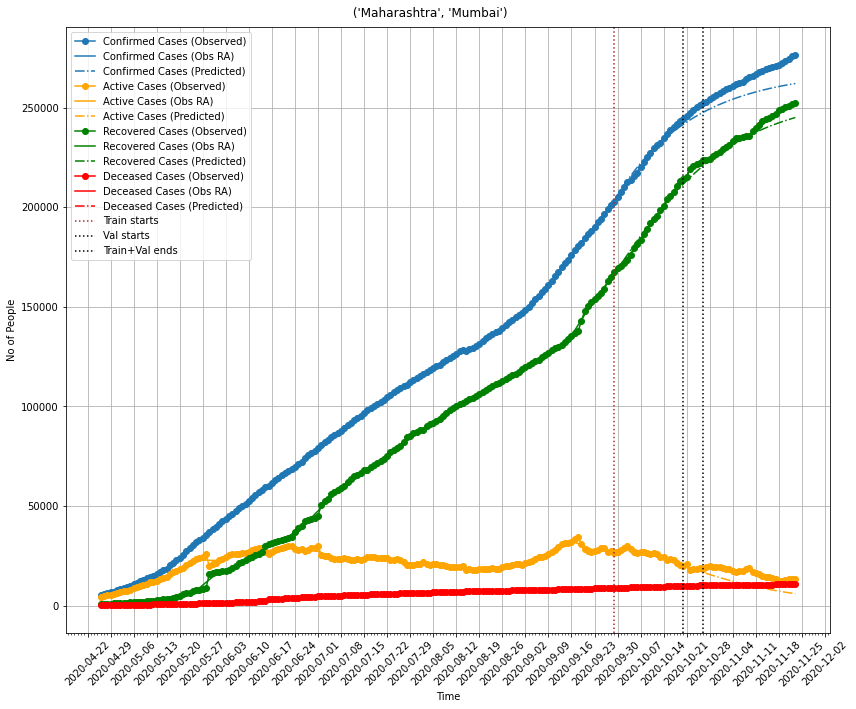

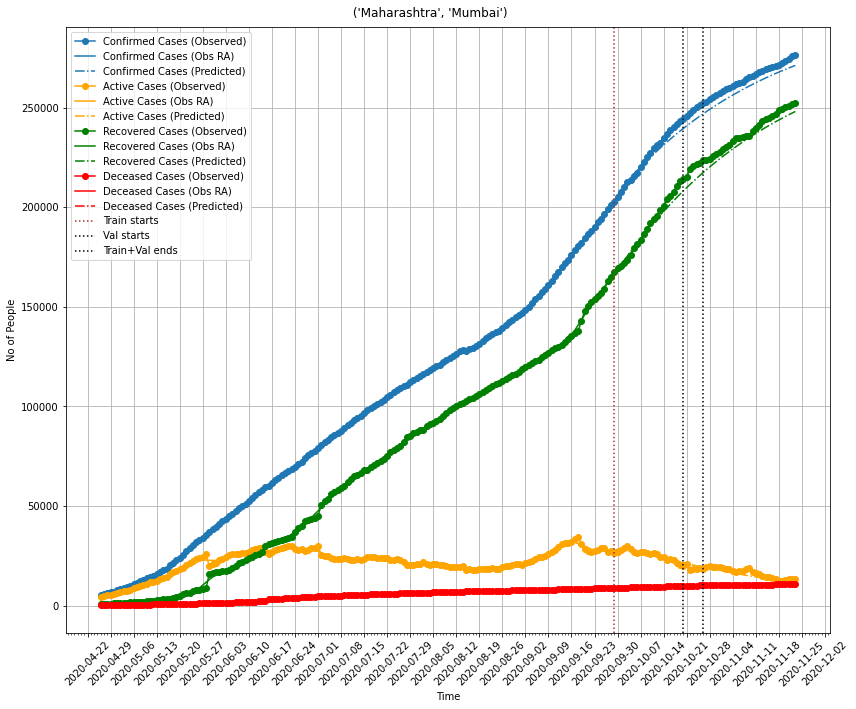

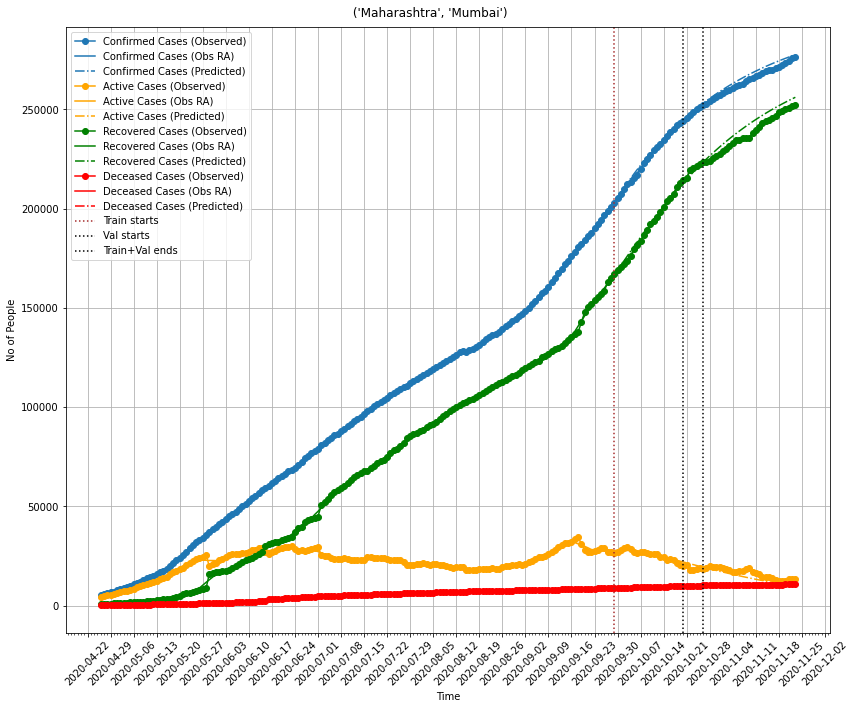

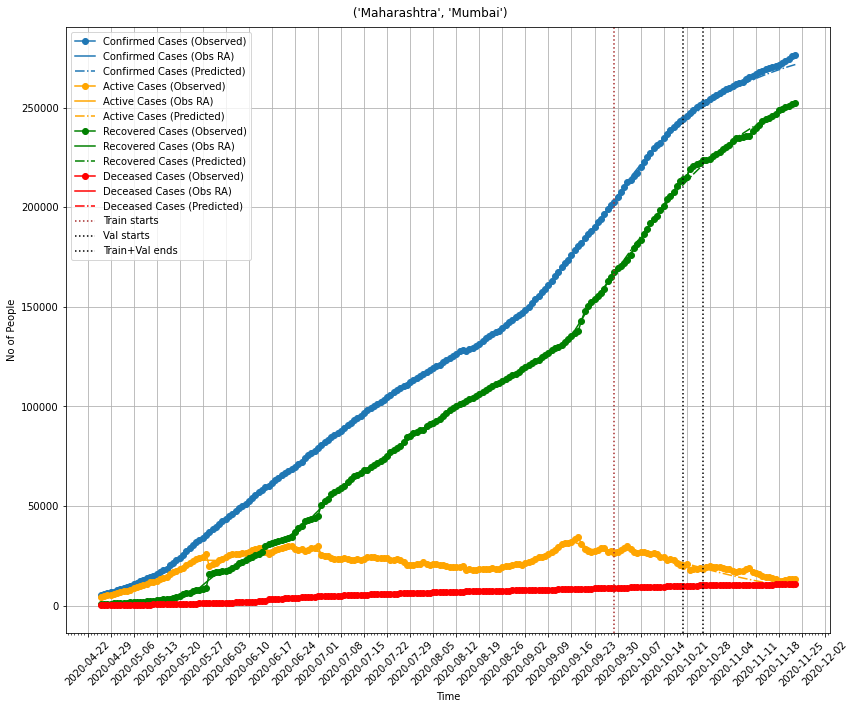

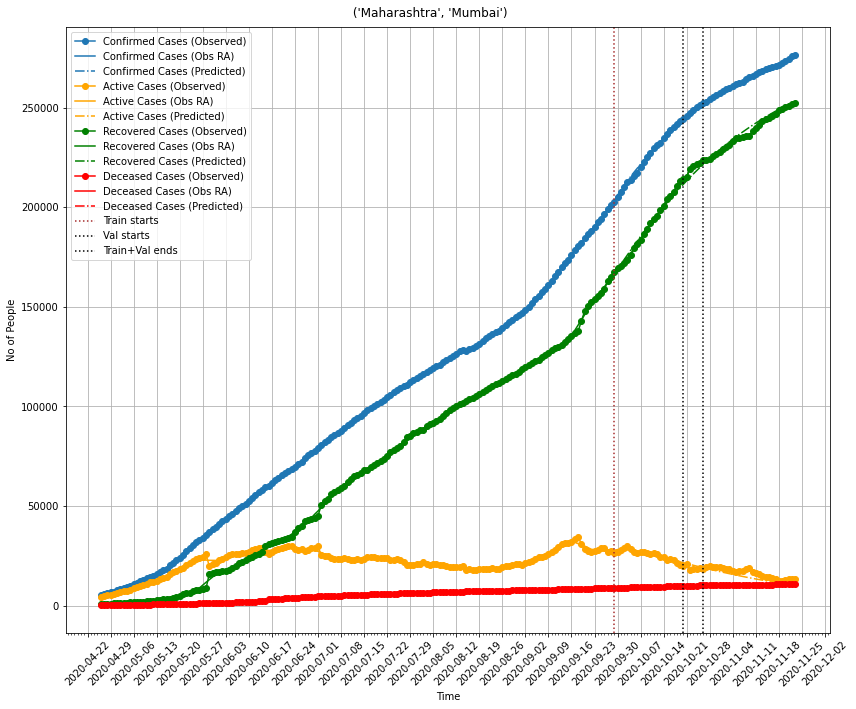

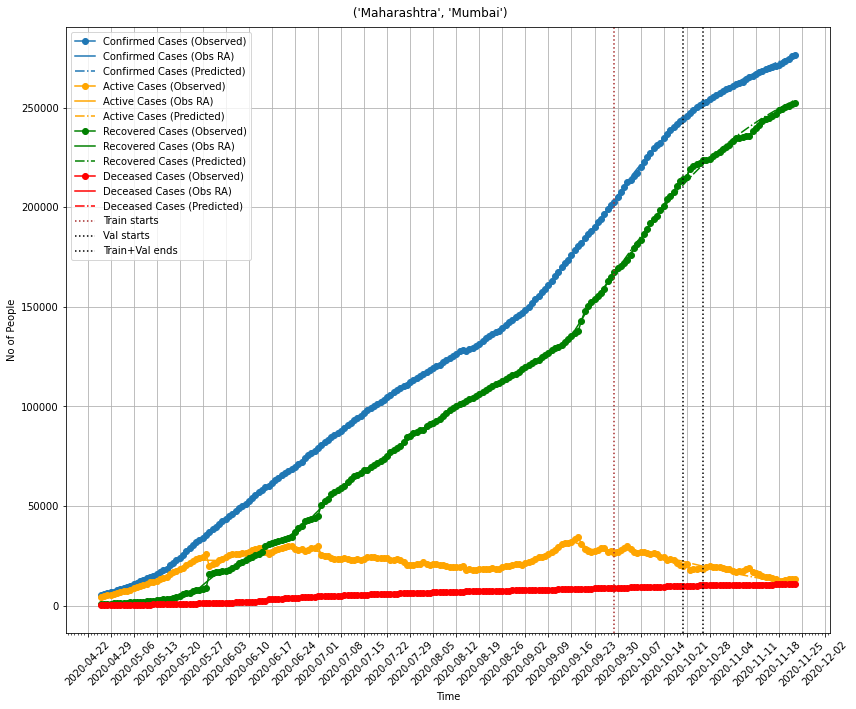

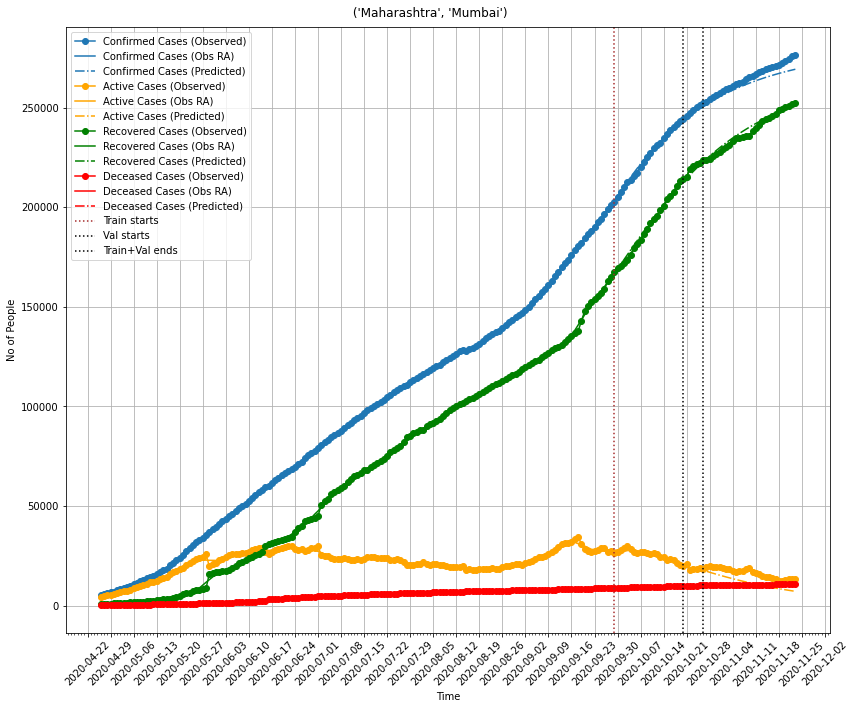

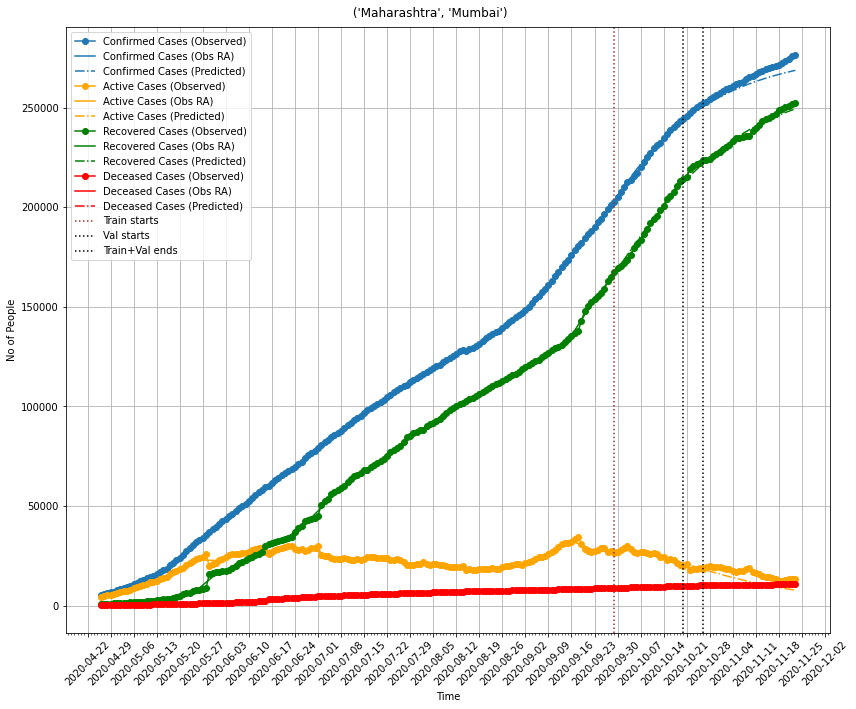

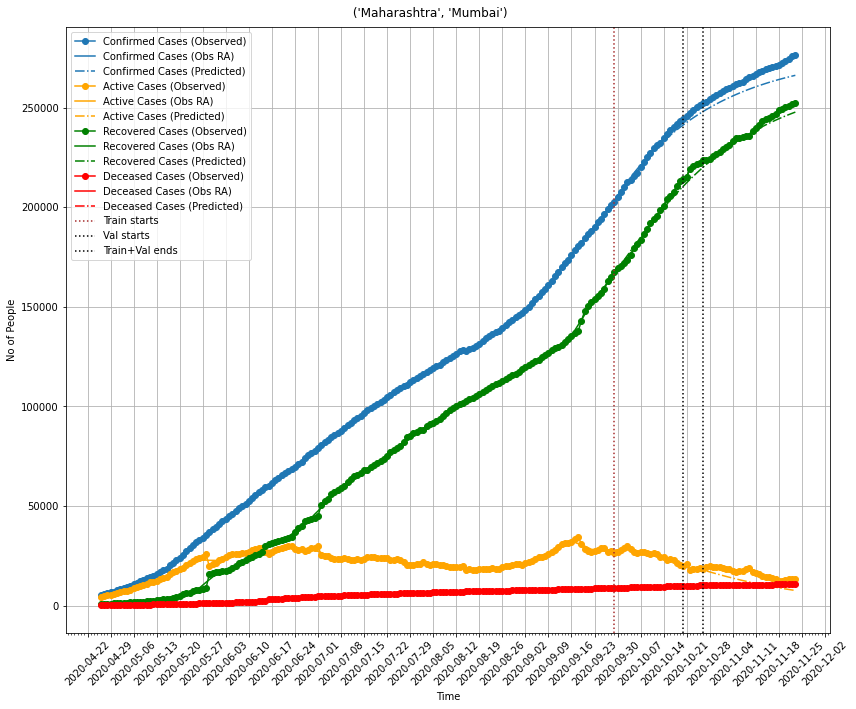

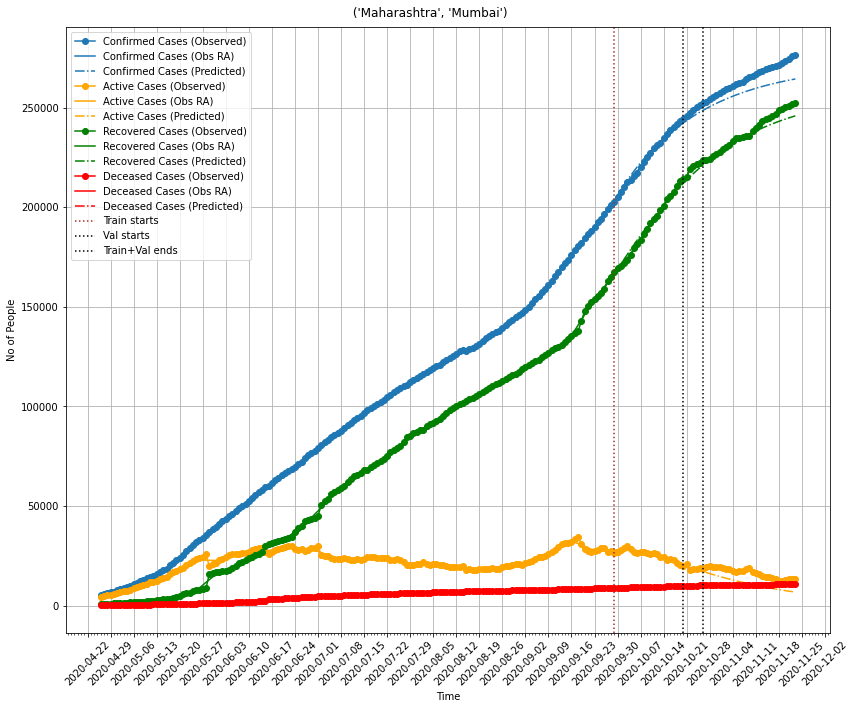

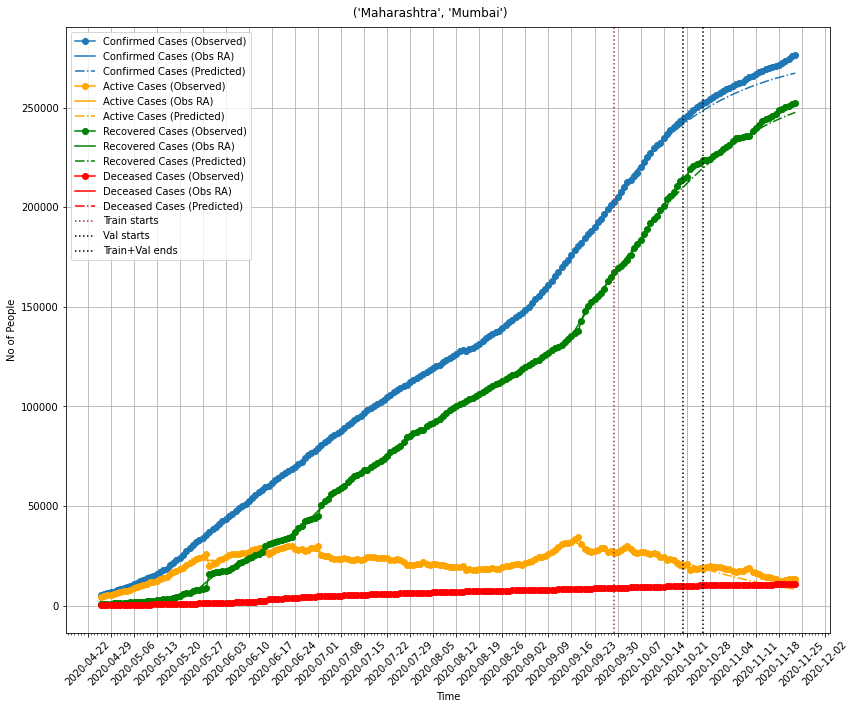

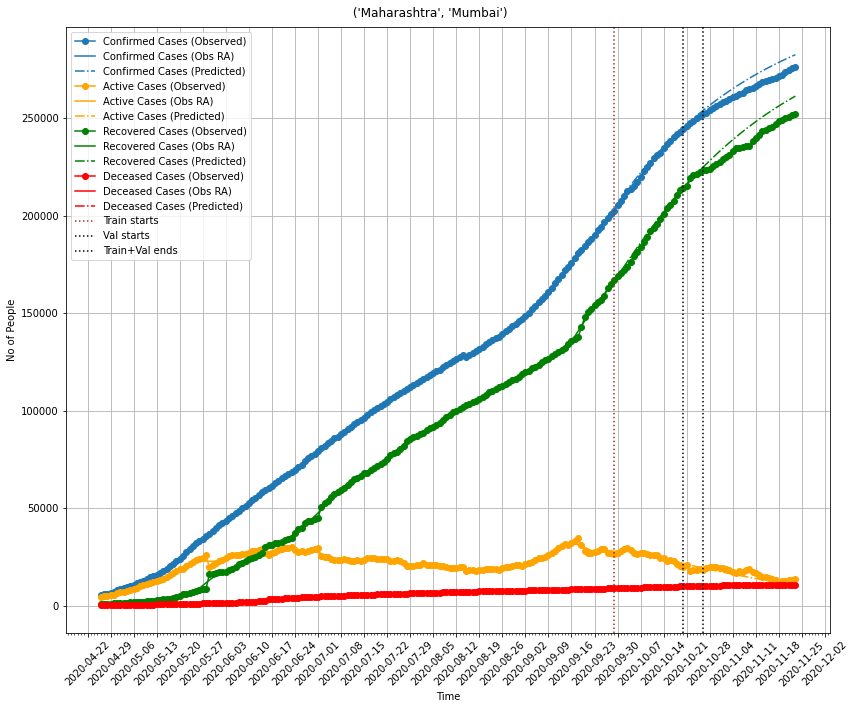

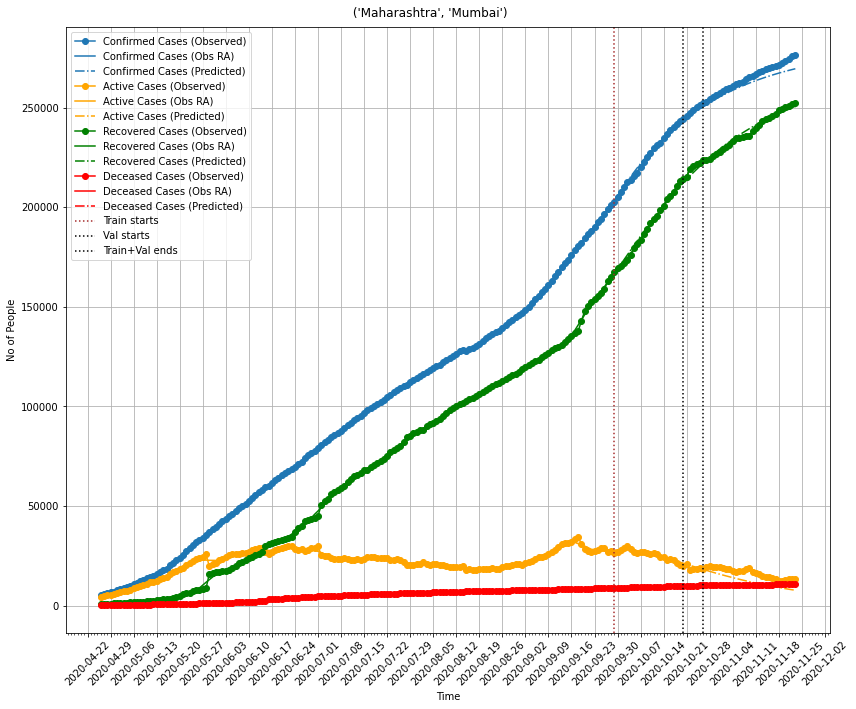

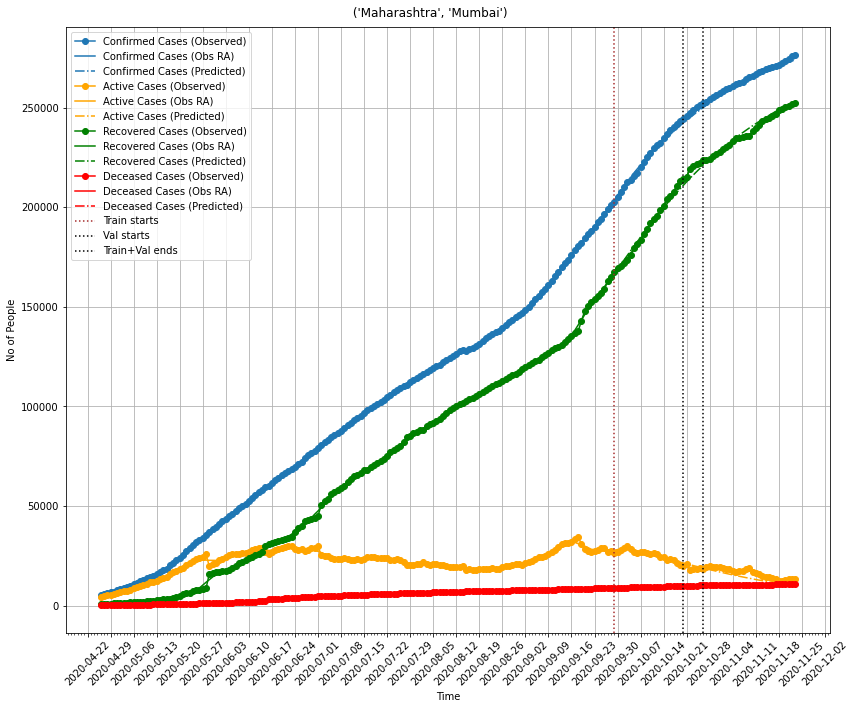

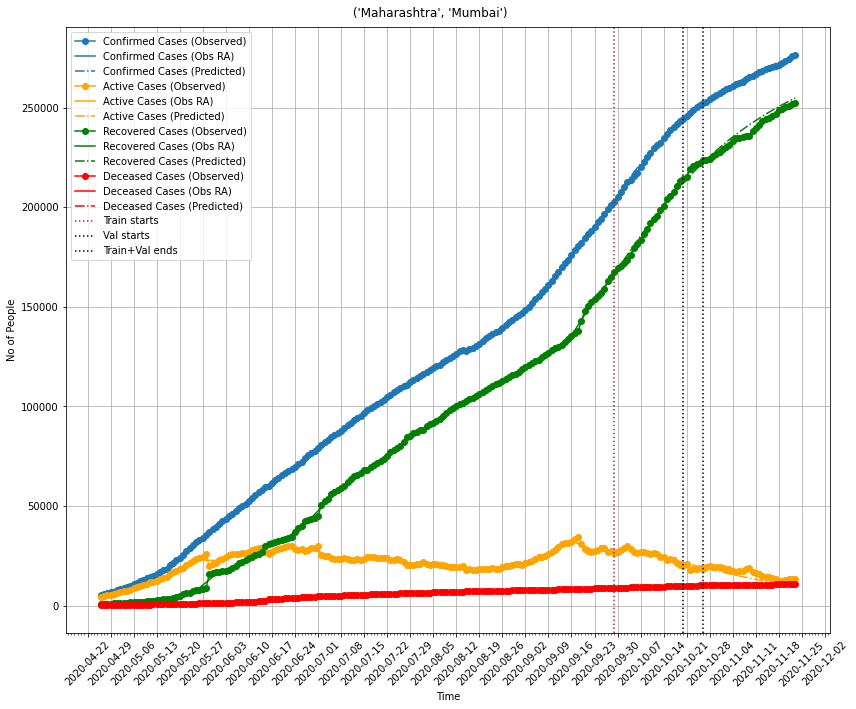

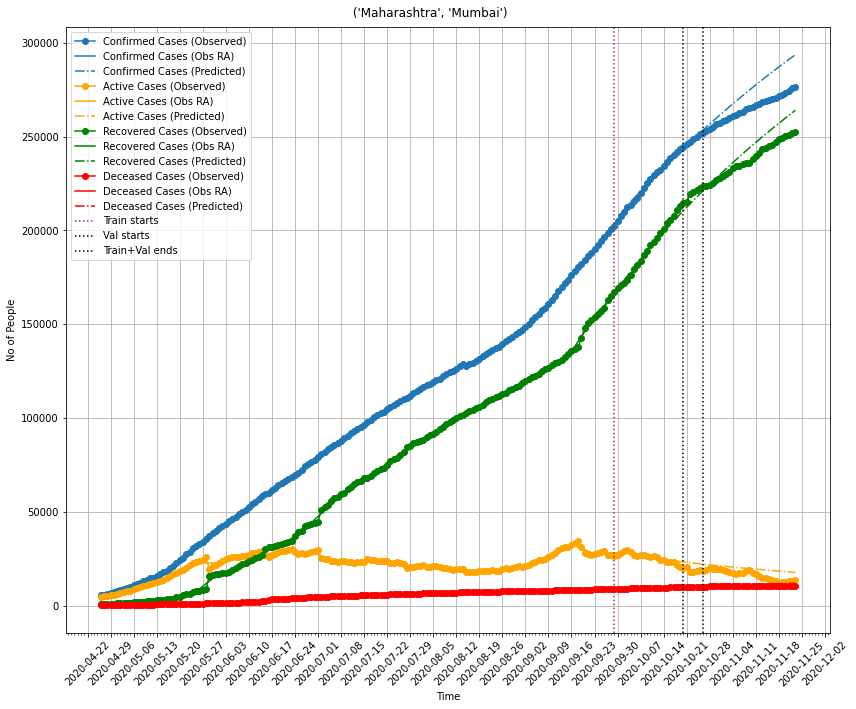

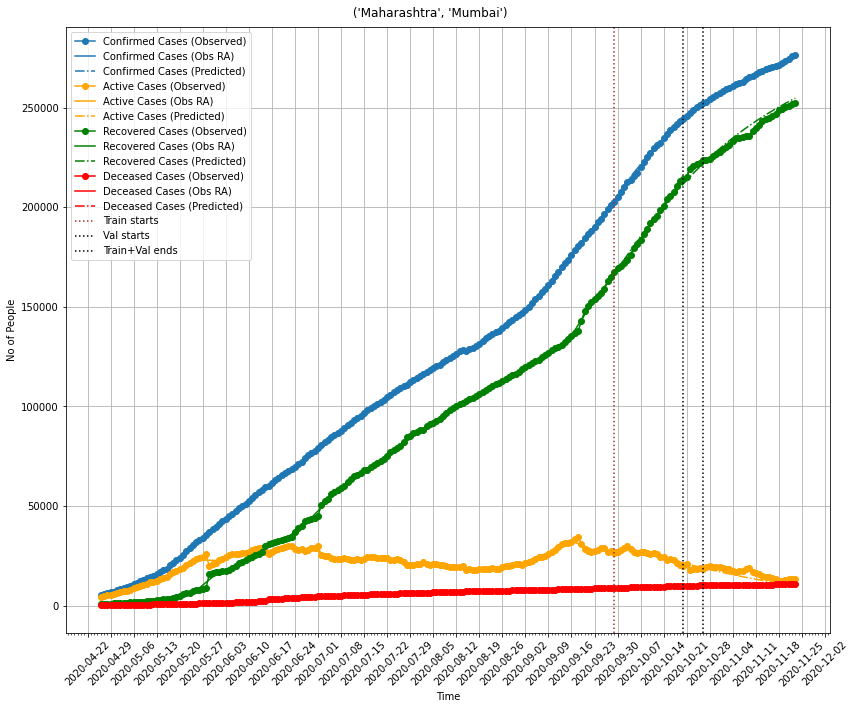

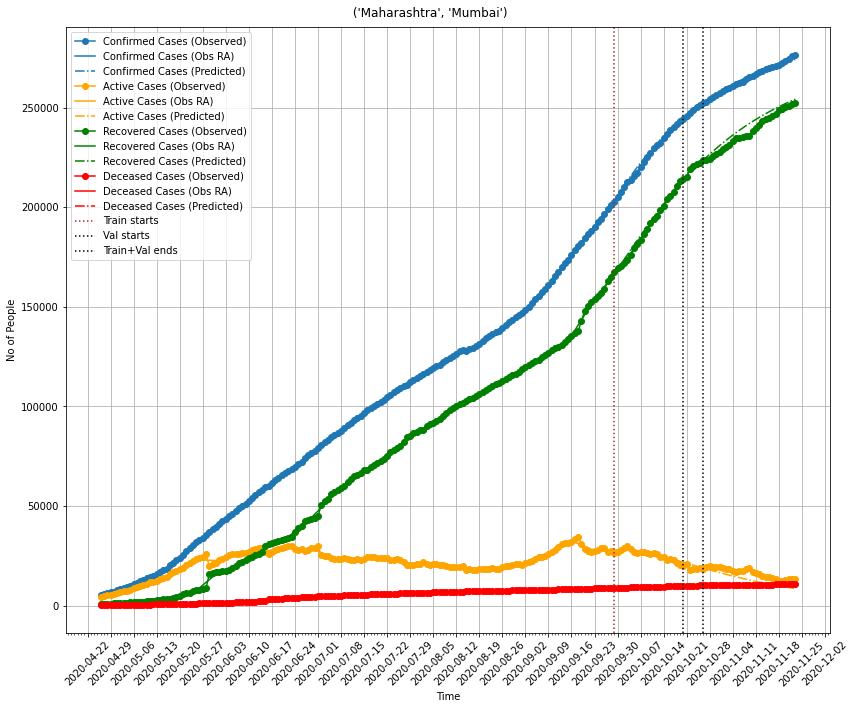

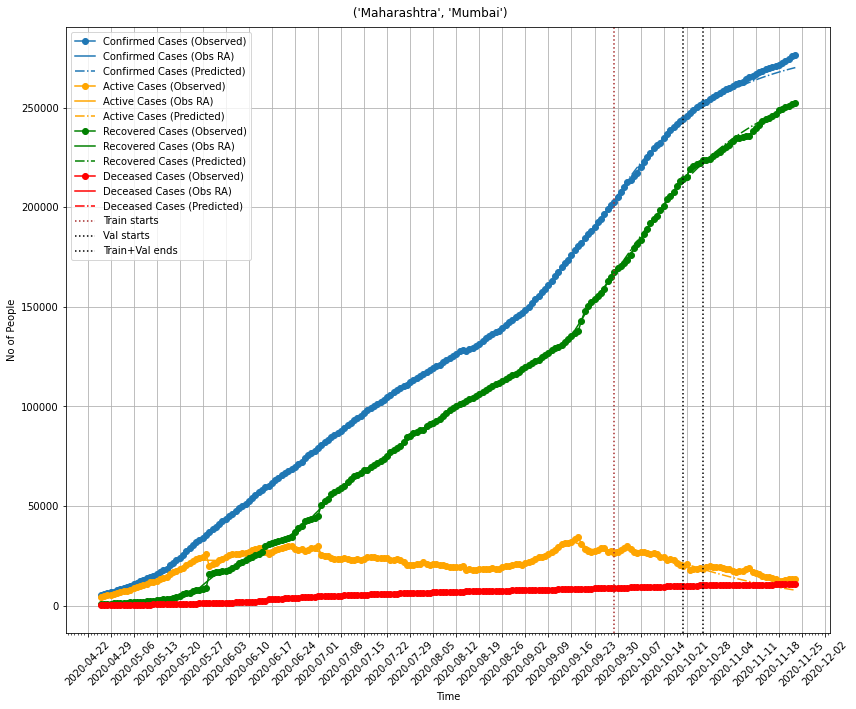

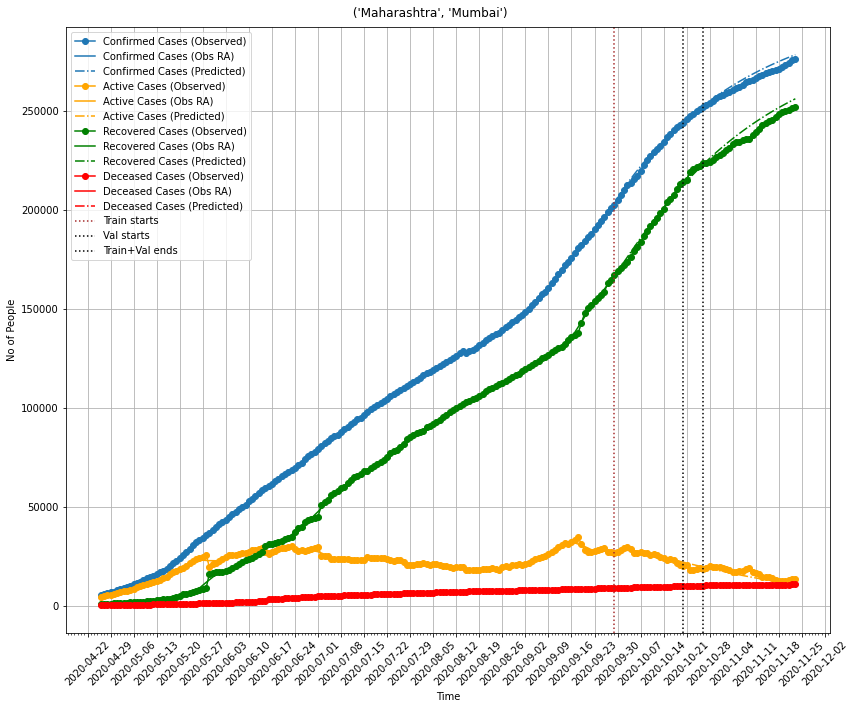

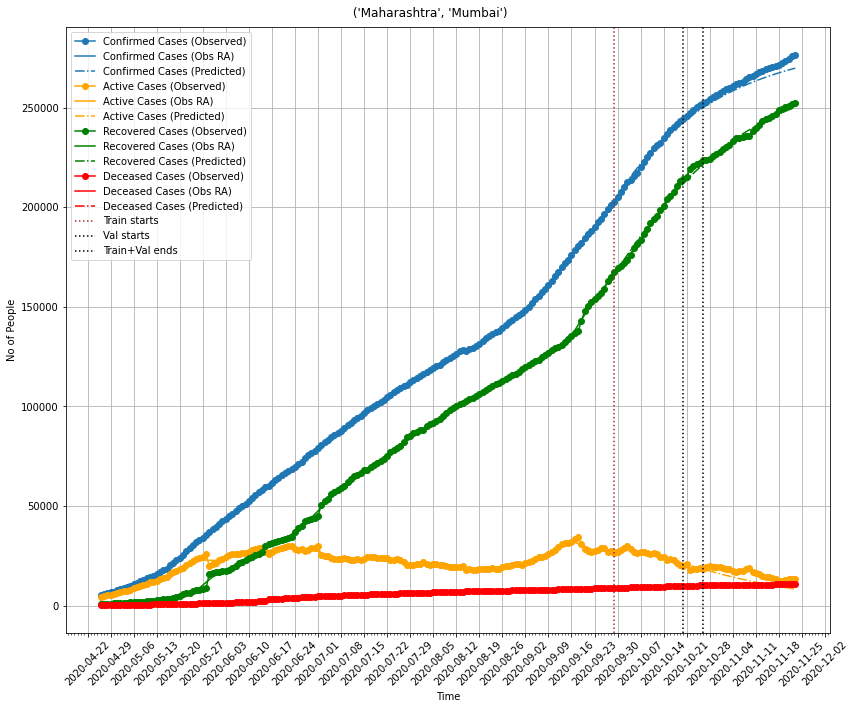

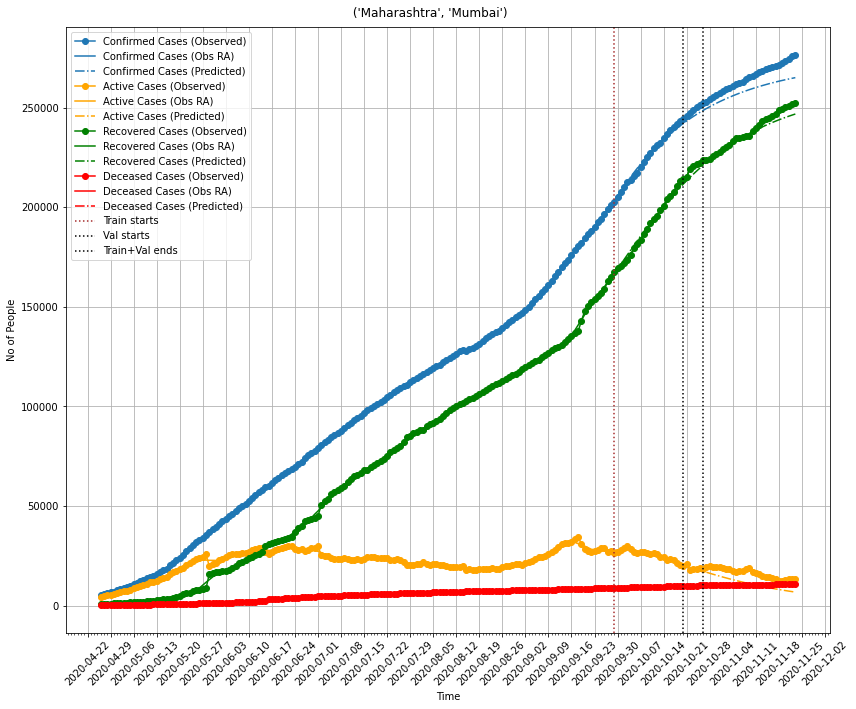

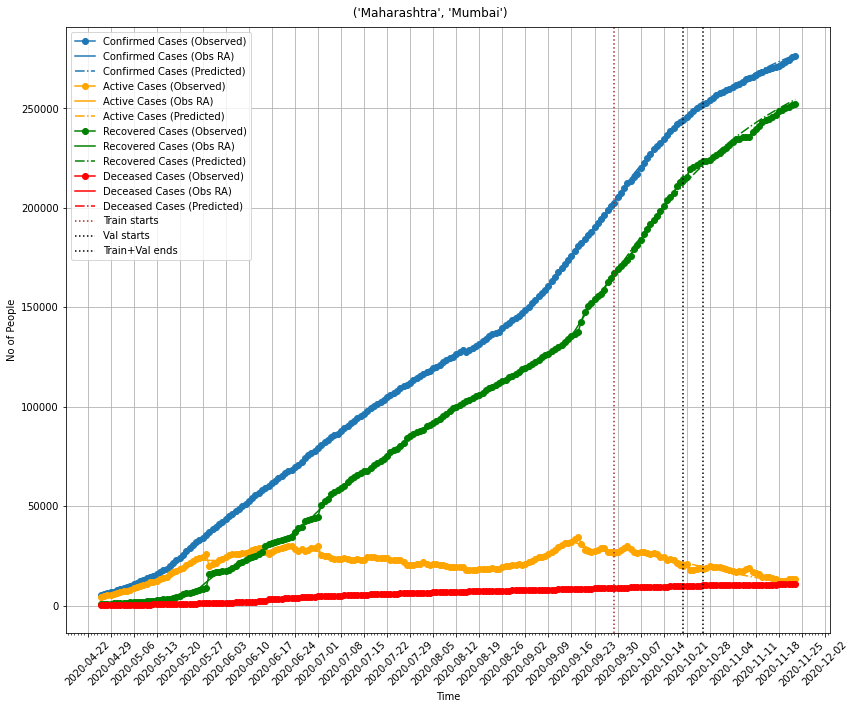

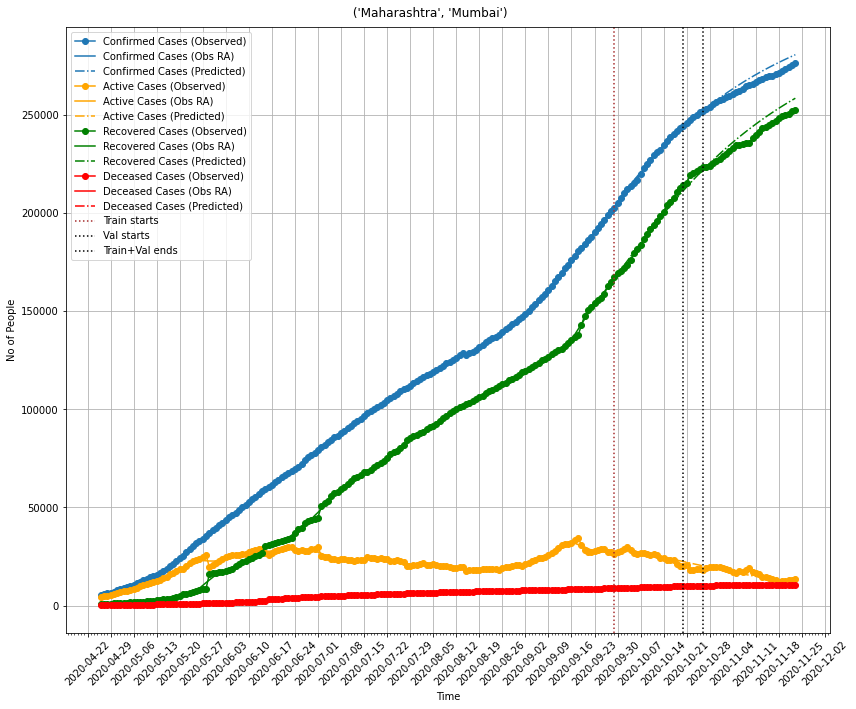

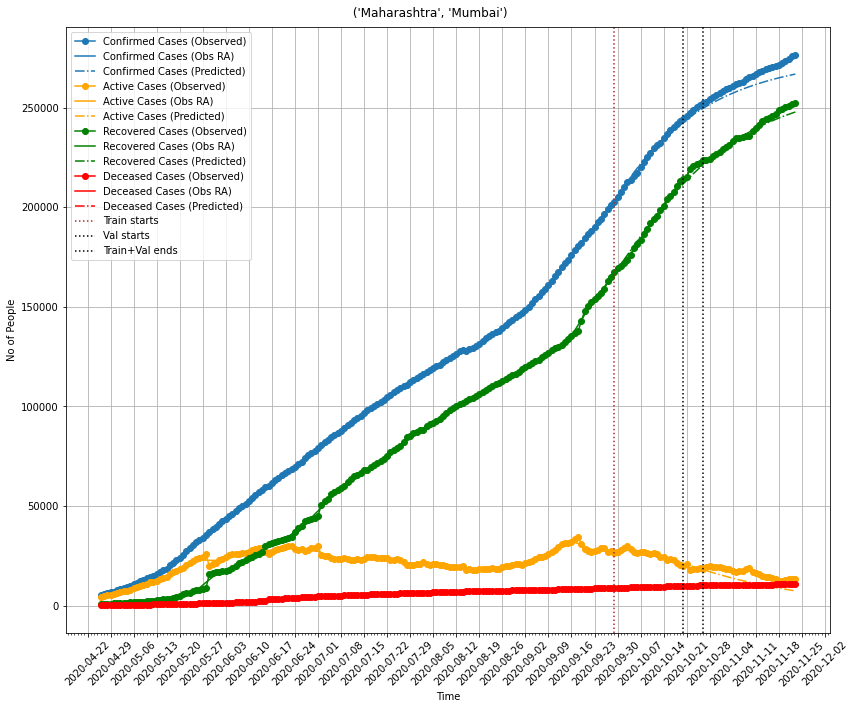

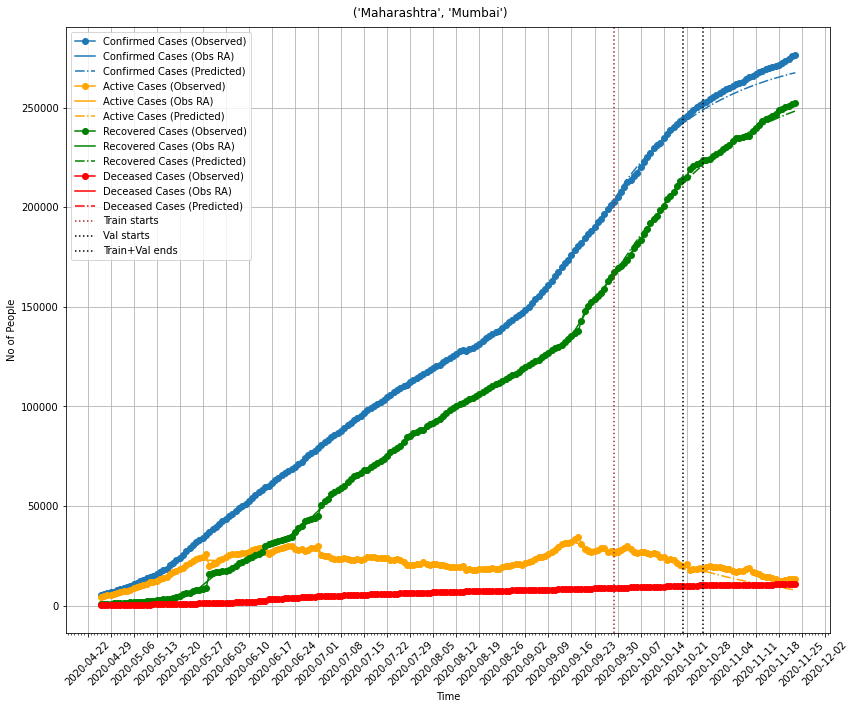

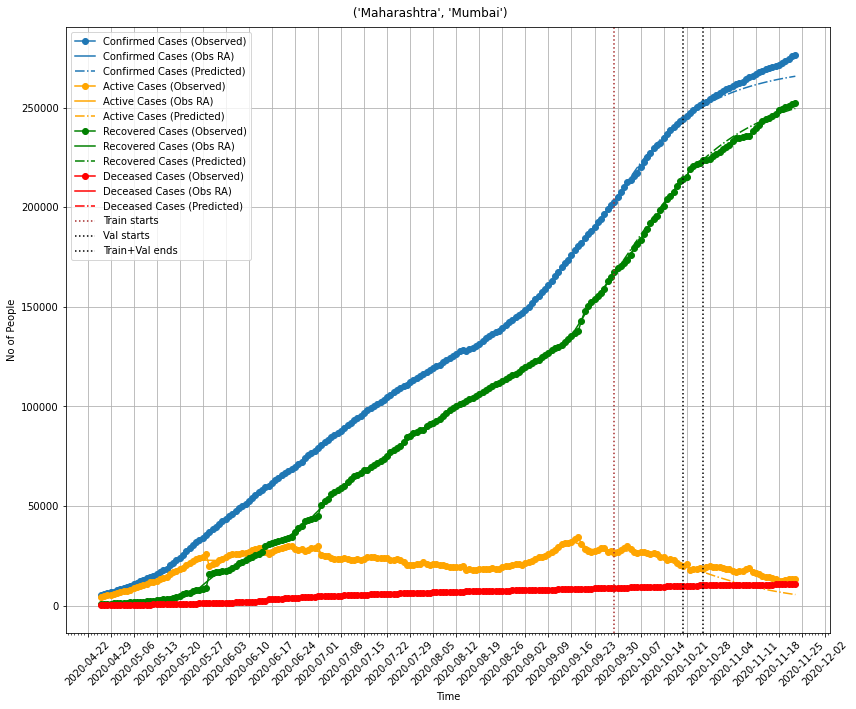

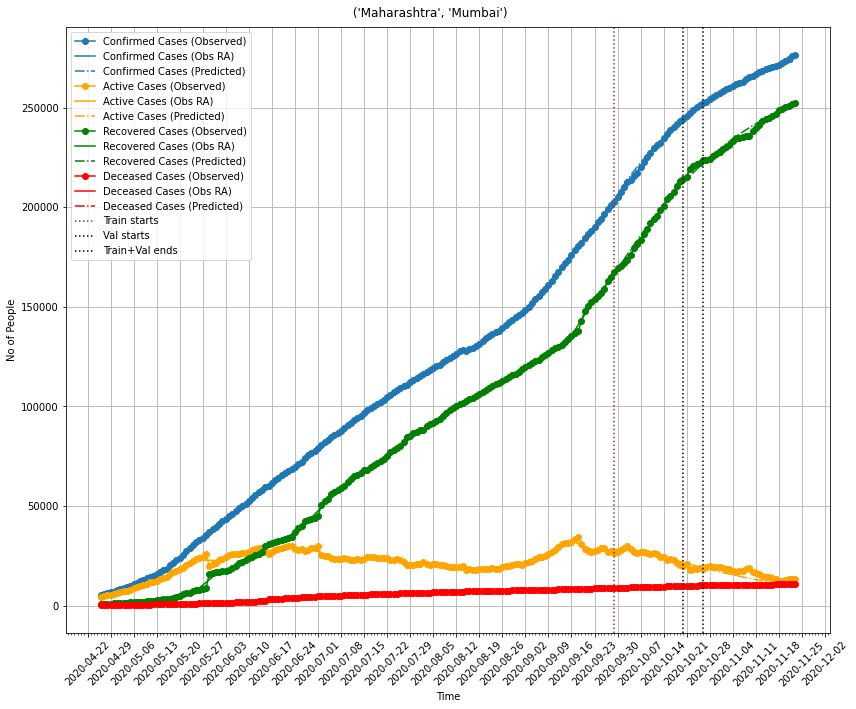

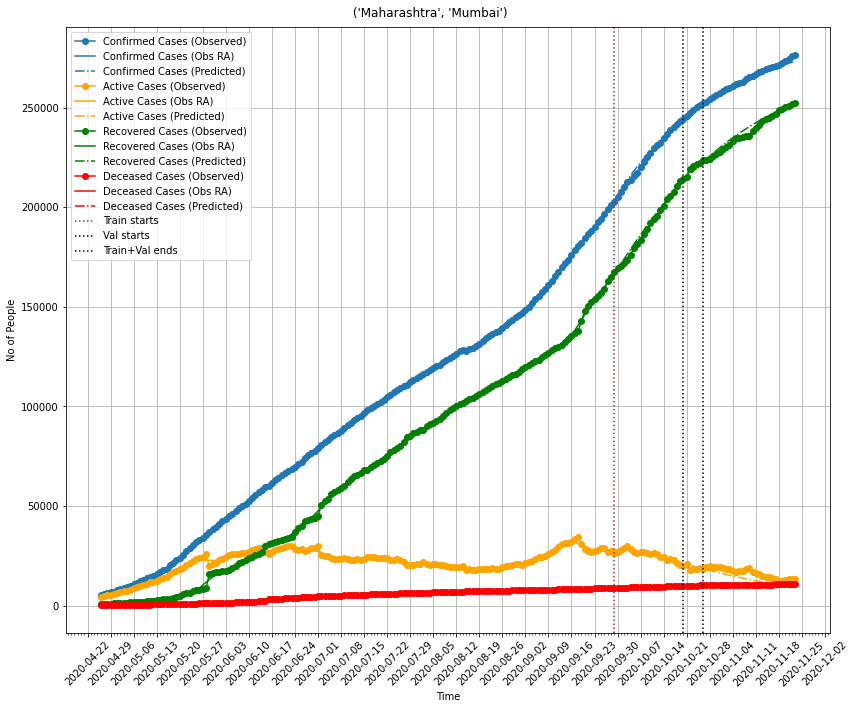

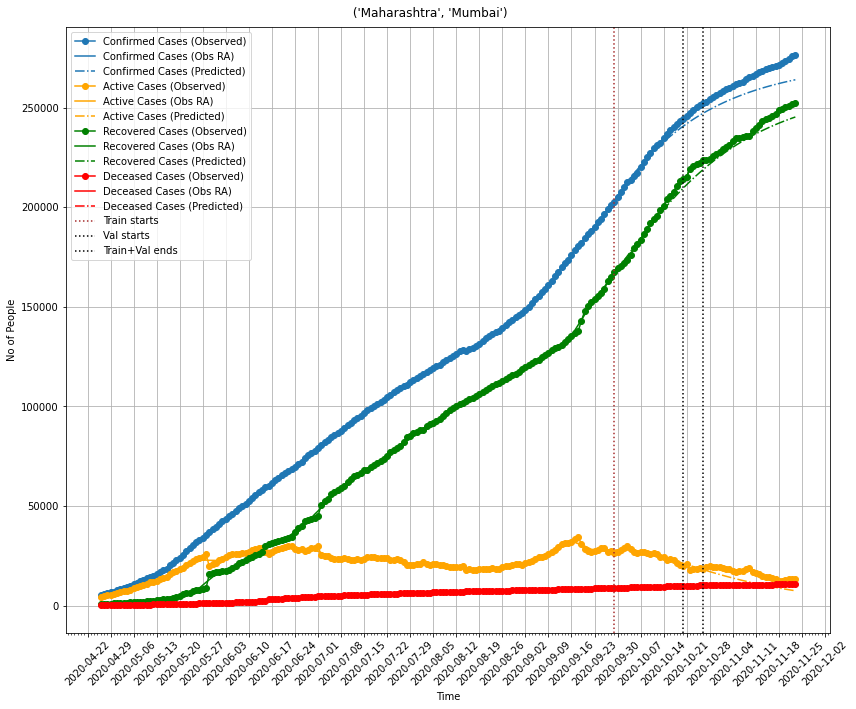

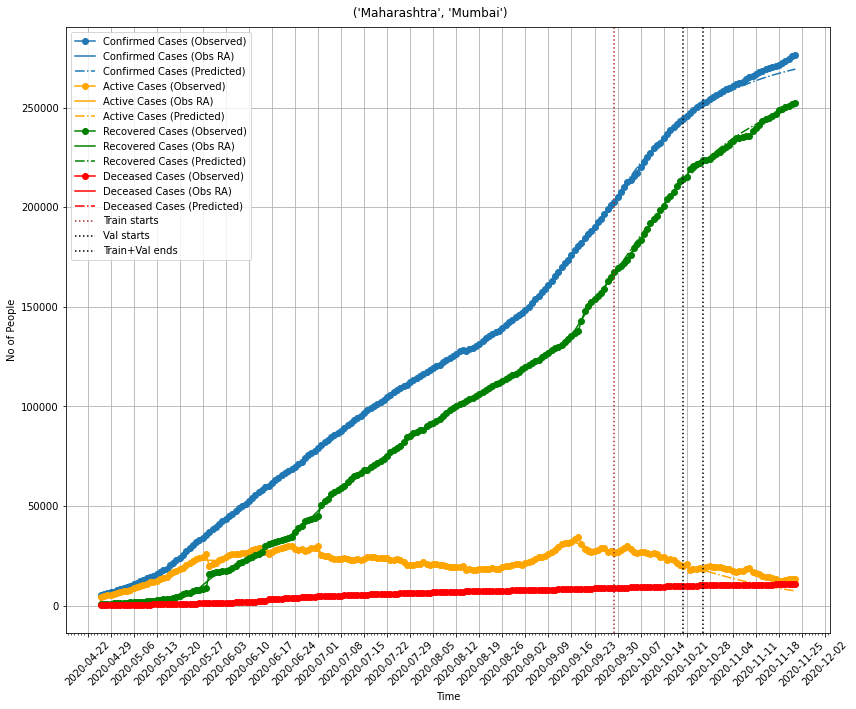

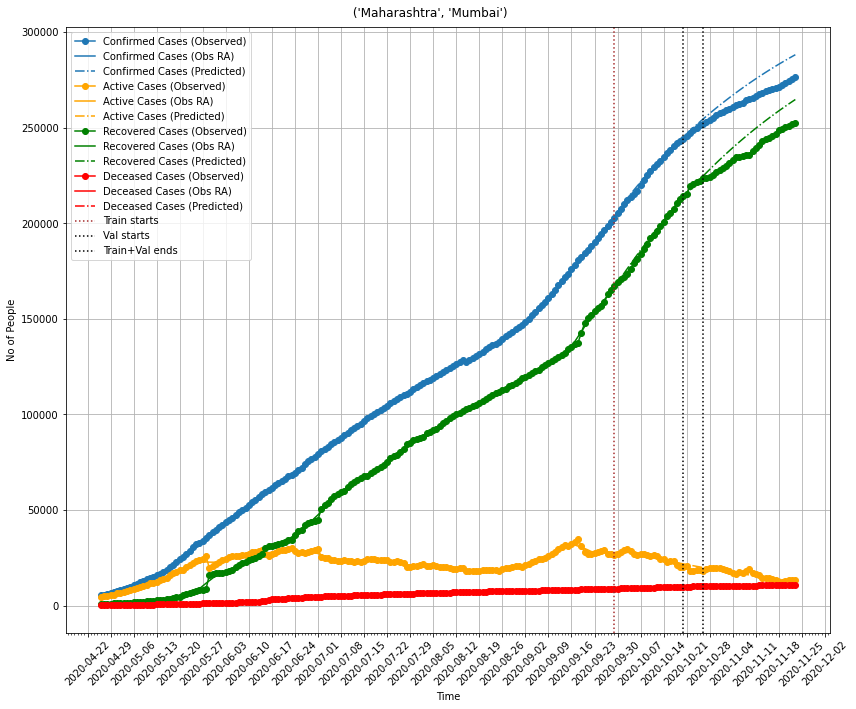

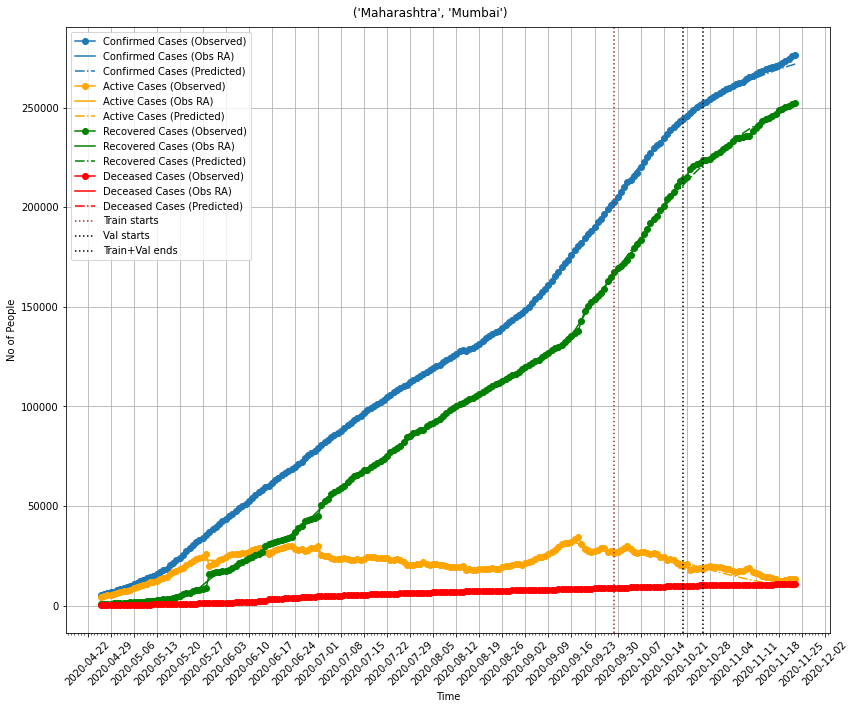

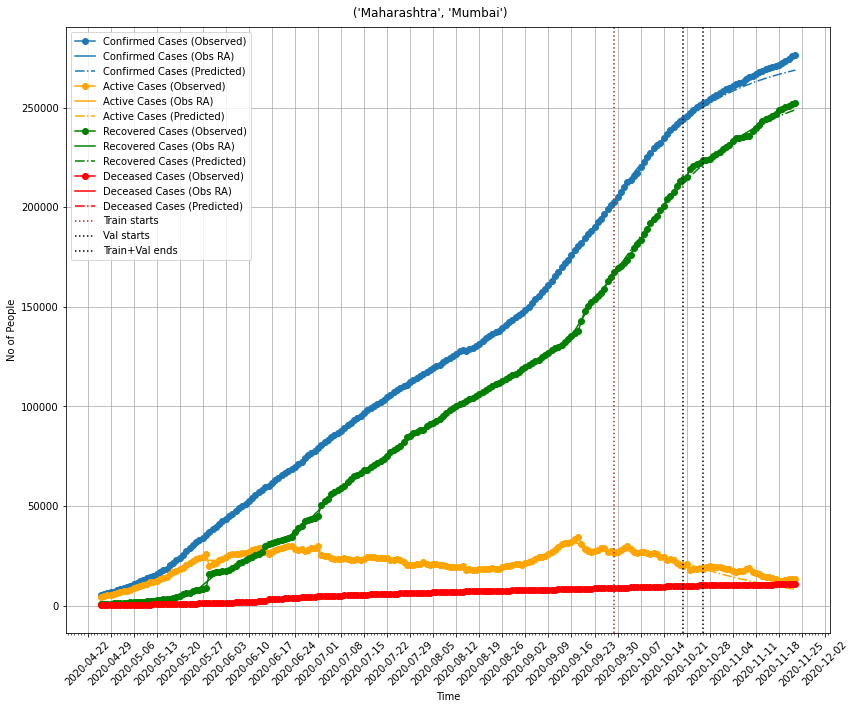

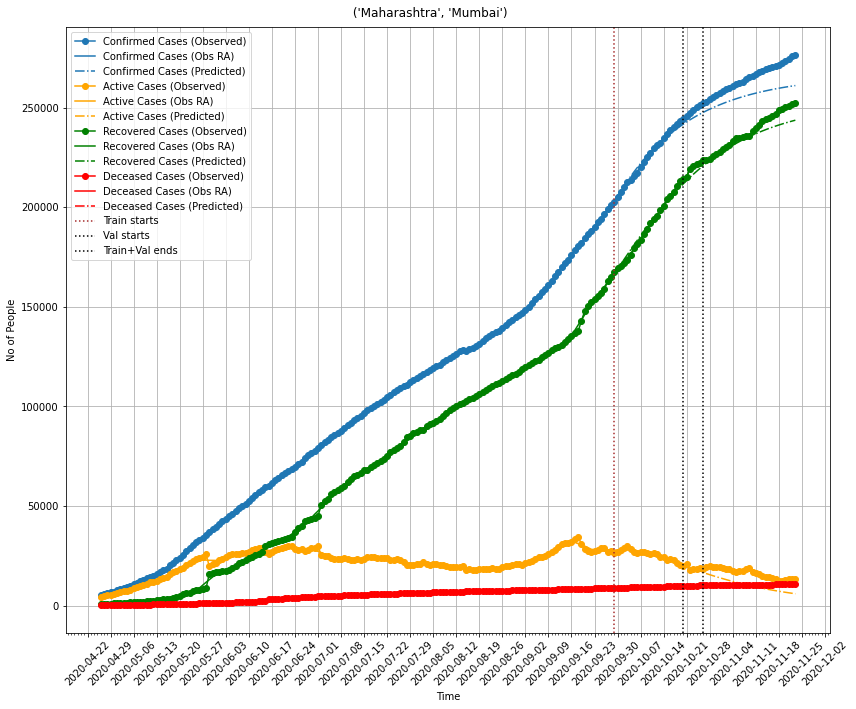

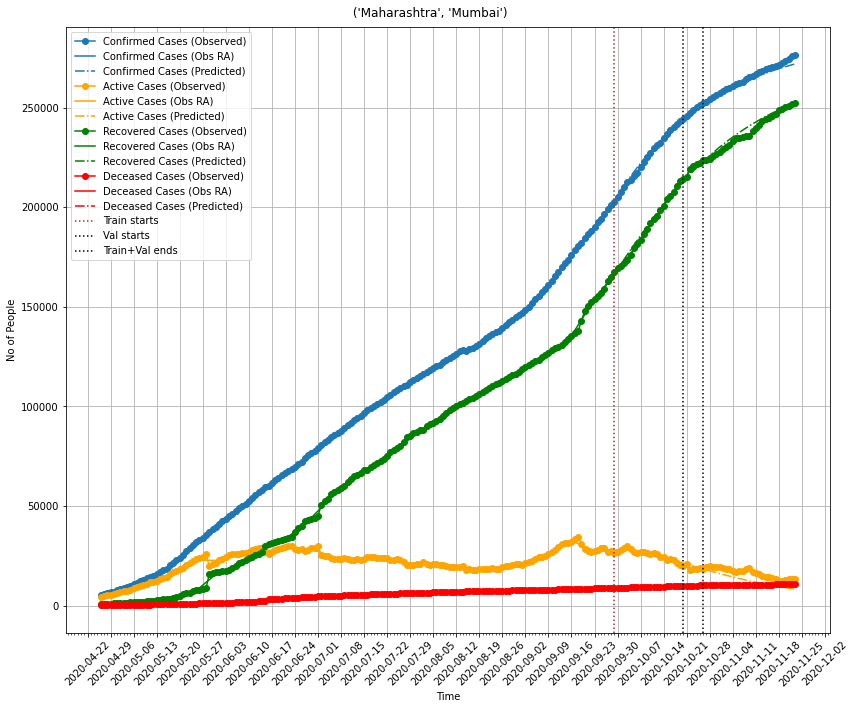

In [5]:
runs = 20
mcmc_P = []
bo_P = []
mcmc_perc_loss = []
bo_perc_loss = []
k = []
PD = {}
for n in range(runs):
    PD[f'm{n}']= {}
    percentile_dict1 = {}
    percentile_dict2 = {}
    percentile_dict1['m1'] = single_fitting_cycle(**copy.deepcopy(config1['fitting']))
    percentile_dict2['m1'] = single_fitting_cycle(**copy.deepcopy(config2['fitting']))
    percentile_dict1['m1']['forecasts'] = {}
    percentile_dict1['m1']['forecasts']['best'] = get_forecast(percentile_dict1, train_fit='m1', 
                                                            model=config1['fitting']['model'], 
                                                            forecast_days=config1['forecast']['forecast_days'])

    percentile_dict1['m1']['trials_processed'] = forecast_all_trials(percentile_dict1, train_fit='m1', 
                                                                    model=config1['fitting']['model'], 
                                                                    forecast_days=config1['forecast']['forecast_days'])
    percentile_dict2['m1']['forecasts'] = {}
    percentile_dict2['m1']['forecasts']['best'] = get_forecast(percentile_dict2, train_fit='m1', 
                                                            model=config2['fitting']['model'], 
                                                            forecast_days=config2['forecast']['forecast_days'])

    percentile_dict2['m1']['trials_processed'] = forecast_all_trials(percentile_dict2, train_fit='m1', 
                                                                    model=config2['fitting']['model'], 
                                                                    forecast_days=config2['forecast']['forecast_days'])

    uncertainty_args1 = {'predictions_dict': percentile_dict1, **config1['uncertainty']['uncertainty_params']}
    uncertainty1 = config1['uncertainty']['method'](**uncertainty_args1)
    uncertainty_args2 = {'predictions_dict': percentile_dict2, 'fitting_config': config2['fitting'],
                    'forecast_config': config2['forecast'], **config2['uncertainty']['uncertainty_params']}
    uncertainty2 = config2['uncertainty']['method'](**uncertainty_args2)
    uncertainty_forecasts1 = uncertainty1.get_forecasts()
    uncertainty_forecasts2 = uncertainty2.get_forecasts()
    mcmc = []
    bo = []
    key = []
    for i in uncertainty_forecasts1.keys():
        key.append(i)
        mcmc.append(uncertainty_forecasts1[i]['df_loss_perc'].mean()[0].item())
        bo.append(uncertainty_forecasts2[i]['df_loss_perc'].mean()[0])
    k = key
    mcmc_perc_loss.append(mcmc)
    bo_perc_loss.append(bo)
    mcmc_P.append(uncertainty1.p_val)
    bo_P.append(uncertainty2.p_val)
    PD[f'm{n}']['MCMC'] = percentile_dict1
    PD[f'm{n}']['BO'] = percentile_dict2
    
    

In [6]:
m = np.array(mcmc_perc_loss)
b = np.array(bo_perc_loss)


In [7]:
m = np.mean(m,axis = 0)
b = np.mean(b,axis = 0)

In [8]:
PD['perc_loss'] = {}
PD['perc_loss']['mcmc'] = m
PD['perc_loss']['bo'] = b

In [9]:
import pickle as pkl
with open('../../misc/predictions/predictions_dict_perc_20.pickle', 'wb') as handle:
    pkl.dump(PD, handle)


In [10]:
with open('../../misc/predictions/predictions_dict_perc_20.pickle', 'rb') as handle:
    PD = pkl.load(handle)

Text(0, 0.5, 'Percentile Loss in Total compartment')

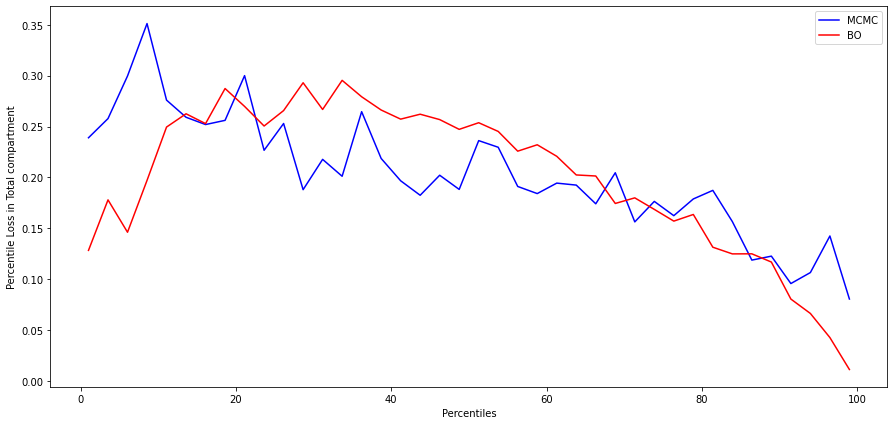

In [11]:
plt.figure(figsize= (15,7))
mc, = plt.plot(key,m,markersize=12,label='MCMC',color='b')
bo, = plt.plot(key,b,markersize=12,label = 'BO',color='r')
plt.legend(handles = [mc,bo])
plt.xlabel('Percentiles')
plt.ylabel('Percentile Loss in Total compartment')

In [12]:
m.mean()

0.20305987583125362

In [13]:
b.mean()

0.20092433943938914

In [14]:
import numpy as np
np.linspace(1,99,40)

array([ 1.        ,  3.51282051,  6.02564103,  8.53846154, 11.05128205,
       13.56410256, 16.07692308, 18.58974359, 21.1025641 , 23.61538462,
       26.12820513, 28.64102564, 31.15384615, 33.66666667, 36.17948718,
       38.69230769, 41.20512821, 43.71794872, 46.23076923, 48.74358974,
       51.25641026, 53.76923077, 56.28205128, 58.79487179, 61.30769231,
       63.82051282, 66.33333333, 68.84615385, 71.35897436, 73.87179487,
       76.38461538, 78.8974359 , 81.41025641, 83.92307692, 86.43589744,
       88.94871795, 91.46153846, 93.97435897, 96.48717949, 99.        ])